In [123]:
#import libaries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [5]:
## upload Jordan Clarkson 2021 data

address = '/Users/raytrey5/Desktop/IST_718_Project/Jordan_Clarkson_2021_GameLog.csv'
#address = 
JC = pd.read_csv(address)
## drop NAs columns 
JC = JC.drop(columns=JC.columns[23:30])
JC = JC.dropna()
JC

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,20+Points
0,25.0,A,ATL,W,9.0,13.0,0.692,5.0,8.0,0.625,...,1.0,6.0,7.0,0.0,0.0,0.0,4.0,2.0,23.0,1.0
1,28.0,H,ATL,W,6.0,17.0,0.353,4.0,12.0,0.333,...,1.0,6.0,7.0,4.0,0.0,0.0,2.0,2.0,16.0,0.0
2,30.0,A,BOS,W,6.0,16.0,0.375,5.0,10.0,0.500,...,2.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,20.0,1.0
3,31.0,H,BOS,W,4.0,15.0,0.267,2.0,10.0,0.200,...,1.0,1.0,2.0,5.0,0.0,0.0,1.0,2.0,13.0,0.0
4,21.0,H,BRK,W,1.0,15.0,0.067,1.0,11.0,0.091,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,34.0,H,SAS,W,7.0,20.0,0.350,2.0,10.0,0.200,...,1.0,5.0,6.0,5.0,2.0,0.0,5.0,3.0,16.0,0.0
61,23.0,A,SAS,W,8.0,13.0,0.615,2.0,6.0,0.333,...,0.0,3.0,3.0,3.0,2.0,0.0,4.0,1.0,18.0,0.0
62,33.0,H,TOR,W,6.0,18.0,0.333,1.0,6.0,0.167,...,0.0,3.0,3.0,3.0,1.0,0.0,3.0,1.0,15.0,0.0
63,23.0,A,TOR,W,3.0,13.0,0.231,3.0,8.0,0.375,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,11.0,1.0


In [6]:
JC[0:55]

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,20+Points
0,25.0,A,ATL,W,9.0,13.0,0.692,5.0,8.0,0.625,...,1.0,6.0,7.0,0.0,0.0,0.0,4.0,2.0,23.0,1.0
1,28.0,H,ATL,W,6.0,17.0,0.353,4.0,12.0,0.333,...,1.0,6.0,7.0,4.0,0.0,0.0,2.0,2.0,16.0,0.0
2,30.0,A,BOS,W,6.0,16.0,0.375,5.0,10.0,0.500,...,2.0,1.0,3.0,3.0,0.0,0.0,2.0,1.0,20.0,1.0
3,31.0,H,BOS,W,4.0,15.0,0.267,2.0,10.0,0.200,...,1.0,1.0,2.0,5.0,0.0,0.0,1.0,2.0,13.0,0.0
4,21.0,H,BRK,W,1.0,15.0,0.067,1.0,11.0,0.091,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
5,20.0,A,BRK,L,5.0,13.0,0.385,2.0,5.0,0.400,...,1.0,1.0,2.0,0.0,2.0,0.0,4.0,0.0,12.0,0.0
6,24.0,H,CHI,W,6.0,13.0,0.462,3.0,7.0,0.429,...,0.0,2.0,2.0,1.0,1.0,0.0,2.0,4.0,19.0,0.0
7,23.0,A,CHI,W,6.0,16.0,0.375,1.0,8.0,0.125,...,1.0,4.0,5.0,2.0,1.0,0.0,1.0,0.0,16.0,0.0
8,25.0,H,CHO,W,7.0,15.0,0.467,5.0,10.0,0.500,...,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0,20.0,1.0
9,23.0,A,CHO,W,6.0,15.0,0.400,3.0,8.0,0.375,...,0.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,15.0,0.0


In [7]:
JC[56:65]

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,20+Points
56,19.0,H,PHO,L,5.0,11.0,0.455,2.0,5.0,0.400,...,2.0,3.0,5.0,2.0,2.0,0.0,1.0,3.0,12.0,0.0
57,22.0,A,POR,W,6.0,12.0,0.500,3.0,6.0,0.500,...,1.0,6.0,7.0,1.0,0.0,1.0,1.0,0.0,15.0,0.0
58,25.0,A,SAC,W,8.0,14.0,0.571,4.0,7.0,0.571,...,0.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,23.0,1.0
59,25.0,H,SAS,W,12.0,16.0,0.750,2.0,4.0,0.500,...,0.0,6.0,6.0,4.0,0.0,0.0,1.0,1.0,30.0,1.0
60,34.0,H,SAS,W,7.0,20.0,0.350,2.0,10.0,0.200,...,1.0,5.0,6.0,5.0,2.0,0.0,5.0,3.0,16.0,0.0
61,23.0,A,SAS,W,8.0,13.0,0.615,2.0,6.0,0.333,...,0.0,3.0,3.0,3.0,2.0,0.0,4.0,1.0,18.0,0.0
62,33.0,H,TOR,W,6.0,18.0,0.333,1.0,6.0,0.167,...,0.0,3.0,3.0,3.0,1.0,0.0,3.0,1.0,15.0,0.0
63,23.0,A,TOR,W,3.0,13.0,0.231,3.0,8.0,0.375,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,11.0,1.0
64,25.0,A,WAS,L,2.0,11.0,0.182,1.0,8.0,0.125,...,0.0,4.0,4.0,6.0,0.0,0.0,5.0,3.0,7.0,0.0


In [8]:
## upload 2021 Defensive metrics

address = '/Users/raytrey5/Desktop/IST_718_Project/OpponentStatsPerGame2021.csv'
Defense2021 = pd.read_csv(address)
Defense2021 = Defense2021.dropna()
Defense2021

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7.0,4.8,0.530,11.1,77.8,0.190
1,Boston Celtics,40.1,86.0,0.466,13.0,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
2,Brooklyn Nets,42.1,91.1,0.461,13.3,36.2,0.369,28.7,55.0,0.523,...,12.7,114.4,35.5,26.8,6.7,5.3,0.531,11.1,77.3,0.187
3,Charlotte Hornets,41.2,88.3,0.467,14.4,39.6,0.364,26.8,48.7,0.550,...,14.8,111.2,33.2,26.8,7.8,4.8,0.550,13.2,75.7,0.163
4,Chicago Bulls,41.5,87.6,0.474,11.5,32.2,0.356,30.0,55.4,0.542,...,12.8,111.8,35.3,26.8,6.7,4.2,0.538,11.6,80.3,0.196
5,Cleveland Cavaliers,42.0,86.6,0.486,12.4,32.4,0.383,29.6,54.1,0.547,...,14.5,112.3,32.3,23.8,7.8,4.5,0.556,13.0,76.6,0.183
6,Dallas Mavericks,40.0,87.1,0.459,12.9,35.2,0.365,27.1,51.8,0.523,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197
7,Denver Nuggets,40.1,85.5,0.469,13.0,35.5,0.365,27.2,50.0,0.543,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.200
8,Detroit Pistons,41.3,87.0,0.475,11.4,31.3,0.362,29.9,55.7,0.538,...,14.0,111.1,33.1,24.2,7.4,5.2,0.541,12.6,76.9,0.195
9,Golden State Warriors,40.2,88.8,0.452,12.5,34.7,0.360,27.7,54.1,0.511,...,15.2,112.7,35.1,27.7,8.2,4.8,0.522,13.1,76.6,0.223


In [9]:
## Duplicate the amount of times Clarkson opponents then delete his team and if he plays the team less than 3 times
newDefense2021 = pd.DataFrame(np.repeat(Defense2021.values,3,axis=0))
newDefense2021.columns = Defense2021.columns
print(newDefense2021)

                  Team OppFG OppFGA OppFGP Opp3P Opp3PA Opp3PPerc Opp2P  \
0        Atlanta Hawks  41.4   88.9  0.466  11.9   33.8     0.351  29.6   
1        Atlanta Hawks  41.4   88.9  0.466  11.9   33.8     0.351  29.6   
2        Atlanta Hawks  41.4   88.9  0.466  11.9   33.8     0.351  29.6   
3       Boston Celtics  40.1     86  0.466    13   34.6     0.377  27.1   
4       Boston Celtics  40.1     86  0.466    13   34.6     0.377  27.1   
..                 ...   ...    ...    ...   ...    ...       ...   ...   
85           Utah Jazz  40.9   91.5  0.447  10.9   32.1     0.341    30   
86           Utah Jazz  40.9   91.5  0.447  10.9   32.1     0.341    30   
87  Washington Wizards  43.2   91.7  0.471  12.5   33.5     0.373  30.7   
88  Washington Wizards  43.2   91.7  0.471  12.5   33.5     0.373  30.7   
89  Washington Wizards  43.2   91.7  0.471  12.5   33.5     0.373  30.7   

   Opp2PA Opp2PPerc  ... OppTOV OppPTS Team_DRB Team_AST Team_STL Team_BLK  \
0    55.1     0.537  

In [10]:
newDefense2021

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
1,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
2,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
3,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
4,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Utah Jazz,40.9,91.5,0.447,10.9,32.1,0.341,30,59.5,0.504,...,11.5,107.5,37.6,23.7,6.6,5.2,0.507,10.3,79.3,0.159
86,Utah Jazz,40.9,91.5,0.447,10.9,32.1,0.341,30,59.5,0.504,...,11.5,107.5,37.6,23.7,6.6,5.2,0.507,10.3,79.3,0.159
87,Washington Wizards,43.2,91.7,0.471,12.5,33.5,0.373,30.7,58.2,0.528,...,14.7,118.8,35.5,25.5,7.3,4.1,0.539,12.5,77.6,0.217
88,Washington Wizards,43.2,91.7,0.471,12.5,33.5,0.373,30.7,58.2,0.528,...,14.7,118.8,35.5,25.5,7.3,4.1,0.539,12.5,77.6,0.217


In [11]:
### Filter by opponent then combine after getting the correct amount of duplicates
df_Hawks = newDefense2021[newDefense2021['Team'] == 'Atlanta Hawks']
df_Hawks = df_Hawks.drop(index=2)
df_Hawks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
1,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19


In [12]:
df_Celtics = newDefense2021[newDefense2021['Team'] == 'Boston Celtics']
df_Celtics = df_Celtics.drop(df_Celtics.index[2])
df_Celtics

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
3,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
4,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215


In [13]:
df_Nets = newDefense2021[newDefense2021['Team'] == 'Brooklyn Nets']
df_Nets = df_Nets.drop(df_Nets.index[2])
df_Nets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
6,Brooklyn Nets,42.1,91.1,0.461,13.3,36.2,0.369,28.7,55,0.523,...,12.7,114.4,35.5,26.8,6.7,5.3,0.531,11.1,77.3,0.187
7,Brooklyn Nets,42.1,91.1,0.461,13.3,36.2,0.369,28.7,55,0.523,...,12.7,114.4,35.5,26.8,6.7,5.3,0.531,11.1,77.3,0.187


In [14]:
df_Bulls = newDefense2021[newDefense2021['Team'] == 'Chicago Bulls']
df_Bulls = df_Bulls.drop(df_Bulls.index[2])
df_Bulls

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
12,Chicago Bulls,41.5,87.6,0.474,11.5,32.2,0.356,30,55.4,0.542,...,12.8,111.8,35.3,26.8,6.7,4.2,0.538,11.6,80.3,0.196
13,Chicago Bulls,41.5,87.6,0.474,11.5,32.2,0.356,30,55.4,0.542,...,12.8,111.8,35.3,26.8,6.7,4.2,0.538,11.6,80.3,0.196


In [15]:
df_Hornets = newDefense2021[newDefense2021['Team'] == 'Charlotte Hornets']
df_Hornets = df_Hornets.drop(df_Hornets.index[2])
df_Hornets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
9,Charlotte Hornets,41.2,88.3,0.467,14.4,39.6,0.364,26.8,48.7,0.55,...,14.8,111.2,33.2,26.8,7.8,4.8,0.55,13.2,75.7,0.163
10,Charlotte Hornets,41.2,88.3,0.467,14.4,39.6,0.364,26.8,48.7,0.55,...,14.8,111.2,33.2,26.8,7.8,4.8,0.55,13.2,75.7,0.163


In [16]:
df_Cavs = newDefense2021[newDefense2021['Team'] == 'Cleveland Cavaliers']
df_Cavs = df_Cavs.drop(df_Cavs.index[2])
df_Cavs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
15,Cleveland Cavaliers,42,86.6,0.486,12.4,32.4,0.383,29.6,54.1,0.547,...,14.5,112.3,32.3,23.8,7.8,4.5,0.556,13,76.6,0.183
16,Cleveland Cavaliers,42,86.6,0.486,12.4,32.4,0.383,29.6,54.1,0.547,...,14.5,112.3,32.3,23.8,7.8,4.5,0.556,13,76.6,0.183


In [17]:
df_Mavs = newDefense2021[newDefense2021['Team'] == 'Dallas Mavericks']
df_Mavs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
18,Dallas Mavericks,40,87.1,0.459,12.9,35.2,0.365,27.1,51.8,0.523,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197
19,Dallas Mavericks,40,87.1,0.459,12.9,35.2,0.365,27.1,51.8,0.523,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197
20,Dallas Mavericks,40,87.1,0.459,12.9,35.2,0.365,27.1,51.8,0.523,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197


In [18]:
df_Nuggets = newDefense2021[newDefense2021['Team'] == 'Denver Nuggets']
df_Nuggets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
21,Denver Nuggets,40.1,85.5,0.469,13,35.5,0.365,27.2,50,0.543,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.2
22,Denver Nuggets,40.1,85.5,0.469,13,35.5,0.365,27.2,50,0.543,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.2
23,Denver Nuggets,40.1,85.5,0.469,13,35.5,0.365,27.2,50,0.543,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.2


In [19]:
df_Pistons = newDefense2021[newDefense2021['Team'] == 'Detroit Pistons']
df_Pistons = df_Pistons.drop(df_Pistons.index[2])
df_Pistons

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
24,Detroit Pistons,41.3,87,0.475,11.4,31.3,0.362,29.9,55.7,0.538,...,14,111.1,33.1,24.2,7.4,5.2,0.541,12.6,76.9,0.195
25,Detroit Pistons,41.3,87,0.475,11.4,31.3,0.362,29.9,55.7,0.538,...,14,111.1,33.1,24.2,7.4,5.2,0.541,12.6,76.9,0.195


In [20]:
df_Warriors = newDefense2021[newDefense2021['Team'] == 'Golden State Warriors']
df_Warriors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
27,Golden State Warriors,40.2,88.8,0.452,12.5,34.7,0.36,27.7,54.1,0.511,...,15.2,112.7,35.1,27.7,8.2,4.8,0.522,13.1,76.6,0.223
28,Golden State Warriors,40.2,88.8,0.452,12.5,34.7,0.36,27.7,54.1,0.511,...,15.2,112.7,35.1,27.7,8.2,4.8,0.522,13.1,76.6,0.223
29,Golden State Warriors,40.2,88.8,0.452,12.5,34.7,0.36,27.7,54.1,0.511,...,15.2,112.7,35.1,27.7,8.2,4.8,0.522,13.1,76.6,0.223


In [21]:
df_Rockets = newDefense2021[newDefense2021['Team'] == 'Houston Rockets']
df_Rockets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
30,Houston Rockets,42.4,88.9,0.477,13.6,35.6,0.383,28.8,53.3,0.54,...,14.7,116.5,33.3,23.6,7.6,5,0.555,12.9,77.1,0.201
31,Houston Rockets,42.4,88.9,0.477,13.6,35.6,0.383,28.8,53.3,0.54,...,14.7,116.5,33.3,23.6,7.6,5,0.555,12.9,77.1,0.201
32,Houston Rockets,42.4,88.9,0.477,13.6,35.6,0.383,28.8,53.3,0.54,...,14.7,116.5,33.3,23.6,7.6,5,0.555,12.9,77.1,0.201


In [22]:
df_Pacers = newDefense2021[newDefense2021['Team'] == 'Indiana Pacers']
df_Pacers = df_Pacers.drop(df_Pacers.index[2])
df_Pacers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
33,Indiana Pacers,42.6,91.3,0.467,11.5,31.4,0.366,31.1,59.9,0.52,...,14.9,114.9,33.7,27.4,8.5,6.4,0.531,12.7,74.9,0.201
34,Indiana Pacers,42.6,91.3,0.467,11.5,31.4,0.366,31.1,59.9,0.52,...,14.9,114.9,33.7,27.4,8.5,6.4,0.531,12.7,74.9,0.201


In [23]:
df_Clippers = newDefense2021[newDefense2021['Team'] == 'Los Angeles Clippers*']
df_Clippers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
36,Los Angeles Clippers*,40,86.4,0.463,11.6,32.5,0.357,28.3,53.8,0.527,...,12.8,107.8,34.7,24.4,7.1,4.1,0.531,11.9,79.1,0.186
37,Los Angeles Clippers*,40,86.4,0.463,11.6,32.5,0.357,28.3,53.8,0.527,...,12.8,107.8,34.7,24.4,7.1,4.1,0.531,11.9,79.1,0.186
38,Los Angeles Clippers*,40,86.4,0.463,11.6,32.5,0.357,28.3,53.8,0.527,...,12.8,107.8,34.7,24.4,7.1,4.1,0.531,11.9,79.1,0.186


In [24]:
df_Lakers = newDefense2021[newDefense2021['Team'] == 'Los Angeles Lakers']
df_Lakers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
39,Los Angeles Lakers,39.7,86.5,0.458,11.3,32.2,0.352,28.3,54.3,0.521,...,15.2,106.5,34.6,24.7,7.8,5.4,0.526,13.7,79.7,0.184
40,Los Angeles Lakers,39.7,86.5,0.458,11.3,32.2,0.352,28.3,54.3,0.521,...,15.2,106.5,34.6,24.7,7.8,5.4,0.526,13.7,79.7,0.184
41,Los Angeles Lakers,39.7,86.5,0.458,11.3,32.2,0.352,28.3,54.3,0.521,...,15.2,106.5,34.6,24.7,7.8,5.4,0.526,13.7,79.7,0.184


In [25]:
df_Grizz = newDefense2021[newDefense2021['Team'] == 'Memphis Grizzlies']
df_Grizz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
42,Memphis Grizzlies,41.1,88.6,0.464,12.8,34.8,0.368,28.2,53.7,0.526,...,14.9,112.4,35.3,26.9,9.1,5.1,0.535,13.1,78.3,0.196
43,Memphis Grizzlies,41.1,88.6,0.464,12.8,34.8,0.368,28.2,53.7,0.526,...,14.9,112.4,35.3,26.9,9.1,5.1,0.535,13.1,78.3,0.196
44,Memphis Grizzlies,41.1,88.6,0.464,12.8,34.8,0.368,28.2,53.7,0.526,...,14.9,112.4,35.3,26.9,9.1,5.1,0.535,13.1,78.3,0.196


In [26]:
df_Heat = newDefense2021[newDefense2021['Team'] == 'Miami Heat']
df_Heat = df_Heat.drop(df_Heat.index[2])
df_Heat

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
45,Miami Heat,39,85.3,0.457,14.4,39.4,0.366,24.6,45.9,0.536,...,15.1,108.1,33.5,26.3,7.9,4,0.542,13.8,77.9,0.183
46,Miami Heat,39,85.3,0.457,14.4,39.4,0.366,24.6,45.9,0.536,...,15.1,108.1,33.5,26.3,7.9,4,0.542,13.8,77.9,0.183


In [27]:
df_Bucks = newDefense2021[newDefense2021['Team'] == 'Milwaukee Bucks']
df_Bucks = df_Bucks.drop(df_Bucks.index[2])
df_Bucks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
48,Milwaukee Bucks,42.3,92.7,0.456,14.7,38.5,0.381,27.6,54.2,0.509,...,13.2,114,37.8,25.5,8.1,4.6,0.536,11.5,79.7,0.157
49,Milwaukee Bucks,42.3,92.7,0.456,14.7,38.5,0.381,27.6,54.2,0.509,...,13.2,114,37.8,25.5,8.1,4.6,0.536,11.5,79.7,0.157


In [28]:
df_Wolves = newDefense2021[newDefense2021['Team'] == 'Minnesota Timberwolves']
df_Wolves

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
51,Minnesota Timberwolves,42.9,89,0.482,13,33.3,0.392,29.9,55.8,0.536,...,15.3,117.6,33,25.6,8.8,5.5,0.556,13.3,76.8,0.207
52,Minnesota Timberwolves,42.9,89,0.482,13,33.3,0.392,29.9,55.8,0.536,...,15.3,117.6,33,25.6,8.8,5.5,0.556,13.3,76.8,0.207
53,Minnesota Timberwolves,42.9,89,0.482,13,33.3,0.392,29.9,55.8,0.536,...,15.3,117.6,33,25.6,8.8,5.5,0.556,13.3,76.8,0.207


In [29]:
df_Pels = newDefense2021[newDefense2021['Team'] == 'New Orleans Pelicans']
df_Pels

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
54,New Orleans Pelicans,41.8,89.2,0.468,14.5,38.1,0.381,27.3,51.1,0.534,...,13.5,114.7,35.7,26,7.6,4.4,0.55,11.9,80,0.186
55,New Orleans Pelicans,41.8,89.2,0.468,14.5,38.1,0.381,27.3,51.1,0.534,...,13.5,114.7,35.7,26,7.6,4.4,0.55,11.9,80,0.186
56,New Orleans Pelicans,41.8,89.2,0.468,14.5,38.1,0.381,27.3,51.1,0.534,...,13.5,114.7,35.7,26,7.6,4.4,0.55,11.9,80,0.186


In [30]:
df_Knicks = newDefense2021[newDefense2021['Team'] == 'New York Knicks']
df_Knicks = df_Knicks.drop(df_Knicks.index[2])
df_Knicks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
57,New York Knicks,37.9,85.9,0.441,12.1,35.6,0.34,25.9,50.4,0.513,...,12.9,104.9,35.5,21.4,7,5.1,0.509,11.7,78.6,0.196
58,New York Knicks,37.9,85.9,0.441,12.1,35.6,0.34,25.9,50.4,0.513,...,12.9,104.9,35.5,21.4,7,5.1,0.509,11.7,78.6,0.196


In [31]:
df_Thunder = newDefense2021[newDefense2021['Team'] == 'Oklahoma City Thunder']
df_Thunder = df_Thunder.drop(df_Thunder.index[[1,2]])
df_Thunder

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
60,Oklahoma City Thunder,43.4,91.5,0.474,13.6,37.2,0.366,29.8,54.3,0.548,...,13.3,115.8,35.7,22.1,7,4.4,0.547,11.5,77.9,0.167


In [32]:
df_Magic = newDefense2021[newDefense2021['Team'] == 'Orlando Magic']
df_Magic = df_Magic.drop(df_Magic.index[2])
df_Magic

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
63,Orlando Magic,42.1,89.5,0.471,13.6,36.8,0.369,28.6,52.7,0.542,...,12.9,112.9,35.1,21.8,6.9,4.4,0.547,11.5,78.2,0.169
64,Orlando Magic,42.1,89.5,0.471,13.6,36.8,0.369,28.6,52.7,0.542,...,12.9,112.9,35.1,21.8,6.9,4.4,0.547,11.5,78.2,0.169


In [33]:
df_Sixers = newDefense2021[newDefense2021['Team'] == 'Philadelphia 76ers']
df_Sixers = df_Sixers.drop(df_Sixers.index[2])
df_Sixers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
66,Philadelphia 76ers,39.5,87.2,0.453,11.9,33.1,0.361,27.6,54.1,0.509,...,15.5,108.1,35,23.7,9.1,6.2,0.521,13.8,78.2,0.2
67,Philadelphia 76ers,39.5,87.2,0.453,11.9,33.1,0.361,27.6,54.1,0.509,...,15.5,108.1,35,23.7,9.1,6.2,0.521,13.8,78.2,0.2


In [34]:
df_Suns = newDefense2021[newDefense2021['Team'] == 'Phoenix Suns']
df_Suns

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
69,Phoenix Suns,40.3,86.7,0.465,11.7,33,0.356,28.6,53.7,0.533,...,13.7,109.3,34.2,26.9,7.2,4.3,0.534,12.4,78.5,0.194
70,Phoenix Suns,40.3,86.7,0.465,11.7,33,0.356,28.6,53.7,0.533,...,13.7,109.3,34.2,26.9,7.2,4.3,0.534,12.4,78.5,0.194
71,Phoenix Suns,40.3,86.7,0.465,11.7,33,0.356,28.6,53.7,0.533,...,13.7,109.3,34.2,26.9,7.2,4.3,0.534,12.4,78.5,0.194


In [35]:
df_Blazers = newDefense2021[newDefense2021['Team'] == 'Portland Trail Blazers']
df_Blazers = df_Blazers.drop(df_Blazers.index[[1,2]])
df_Blazers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
72,Portland Trail Blazers,41.8,88.2,0.475,12.9,34.6,0.373,29,53.6,0.54,...,12.5,114.5,33.9,21.3,6.9,5,0.546,11.2,77.5,0.203


In [36]:
df_Kings = newDefense2021[newDefense2021['Team'] == 'Sacramento Kings']
df_Kings = df_Kings.drop(df_Kings.index[[1,2]])
df_Kings

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
75,Sacramento Kings,43.7,89.5,0.488,12.4,32.5,0.38,31.3,57,0.55,...,13.6,117.5,32,25.5,7.5,5,0.557,12.1,75,0.199


In [37]:
df_Spurs = newDefense2021[newDefense2021['Team'] == 'San Antonio Spurs']
df_Spurs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
78,San Antonio Spurs,42.2,89.8,0.47,12.2,32.6,0.374,29.9,57.2,0.524,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
79,San Antonio Spurs,42.2,89.8,0.47,12.2,32.6,0.374,29.9,57.2,0.524,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
80,San Antonio Spurs,42.2,89.8,0.47,12.2,32.6,0.374,29.9,57.2,0.524,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174


In [38]:
df_Raptors = newDefense2021[newDefense2021['Team'] == 'Toronto Raptors']
df_Raptors = df_Raptors.drop(df_Raptors.index[2])
df_Raptors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
81,Toronto Raptors,38.8,84.5,0.459,13.8,36.6,0.377,25,47.9,0.522,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234
82,Toronto Raptors,38.8,84.5,0.459,13.8,36.6,0.377,25,47.9,0.522,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [39]:
df_Wiz = newDefense2021[newDefense2021['Team'] == 'Washington Wizards']
df_Wiz = df_Wiz.drop(df_Wiz.index[[1,2]])
df_Wiz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
87,Washington Wizards,43.2,91.7,0.471,12.5,33.5,0.373,30.7,58.2,0.528,...,14.7,118.8,35.5,25.5,7.3,4.1,0.539,12.5,77.6,0.217


In [40]:
frames = [df_Hawks, df_Celtics, df_Nets, df_Bulls, df_Hornets, df_Cavs, df_Mavs, df_Nuggets, df_Pistons, df_Warriors,
         df_Rockets, df_Pacers, df_Clippers, df_Lakers, df_Grizz, df_Heat, df_Bucks, df_Wolves, df_Pels,
         df_Knicks, df_Thunder, df_Magic, df_Sixers, df_Suns, df_Blazers, df_Kings, df_Spurs, df_Raptors, df_Wiz ]

FinalDefense2021 = pd.concat(frames)

In [41]:
FinalDefense2021

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
1,Atlanta Hawks,41.4,88.9,0.466,11.9,33.8,0.351,29.6,55.1,0.537,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
3,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
4,Boston Celtics,40.1,86,0.466,13,34.6,0.377,27.1,51.5,0.526,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
6,Brooklyn Nets,42.1,91.1,0.461,13.3,36.2,0.369,28.7,55,0.523,...,12.7,114.4,35.5,26.8,6.7,5.3,0.531,11.1,77.3,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,San Antonio Spurs,42.2,89.8,0.47,12.2,32.6,0.374,29.9,57.2,0.524,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
80,San Antonio Spurs,42.2,89.8,0.47,12.2,32.6,0.374,29.9,57.2,0.524,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
81,Toronto Raptors,38.8,84.5,0.459,13.8,36.6,0.377,25,47.9,0.522,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234
82,Toronto Raptors,38.8,84.5,0.459,13.8,36.6,0.377,25,47.9,0.522,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [42]:
## Combine Clarkson Gamelog with Defensive metrics

JC_df = pd.concat([JC.reset_index(drop=True),FinalDefense2021.reset_index(drop=True)], axis=1)
JC_df

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,25.0,A,ATL,W,9.0,13.0,0.692,5.0,8.0,0.625,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
1,28.0,H,ATL,W,6.0,17.0,0.353,4.0,12.0,0.333,...,12.3,111.8,35.1,24.1,7,4.8,0.53,11.1,77.8,0.19
2,30.0,A,BOS,W,6.0,16.0,0.375,5.0,10.0,0.500,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
3,31.0,H,BOS,W,4.0,15.0,0.267,2.0,10.0,0.200,...,14.1,111.6,33.6,23.5,7.7,5.3,0.539,12.8,78.1,0.215
4,21.0,H,BRK,W,1.0,15.0,0.067,1.0,11.0,0.091,...,12.7,114.4,35.5,26.8,6.7,5.3,0.531,11.1,77.3,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,34.0,H,SAS,W,7.0,20.0,0.350,2.0,10.0,0.200,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
61,23.0,A,SAS,W,8.0,13.0,0.615,2.0,6.0,0.333,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
62,33.0,H,TOR,W,6.0,18.0,0.333,1.0,6.0,0.167,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234
63,23.0,A,TOR,W,3.0,13.0,0.231,3.0,8.0,0.375,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [43]:
### Repeat for previous 2 seasons for the training data

## upload Jordan Clarkson 2021 data

address = '/Users/raytrey5/Desktop/IST_718_Project/Jordan_Clarkson_2020_GameLog.csv'
JC2020 = pd.read_csv(address)
## drop NAs columns 
JC2020 = JC2020.drop(columns=JC2020.columns[23:30])
JC2020 = JC2020.dropna()
JC2020


,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,20+Points
0,27.0,A,BOS,W,7.0,13.0,0.538,1.0,5.0,0.200,...,2.0,2.0,4.0,2.0,1.0,0.0,2.0,3.0,17.0,0.0
1,20.0,H,BOS,L,4.0,13.0,0.308,1.0,6.0,0.167,...,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0
2,26.0,A,BOS,L,7.0,14.0,0.500,3.0,8.0,0.375,...,0.0,3.0,3.0,3.0,1.0,0.0,3.0,1.0,19.0,0.0
3,26.0,H,BOS,L,4.0,13.0,0.308,1.0,5.0,0.200,...,0.0,3.0,3.0,4.0,0.0,2.0,1.0,1.0,12.0,0.0
4,26.0,A,BRK,W,6.0,13.0,0.462,1.0,5.0,0.200,...,1.0,2.0,3.0,1.0,0.0,0.0,1.0,3.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,24.0,H,TOR,L,3.0,9.0,0.333,1.0,6.0,0.167,...,0.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,9.0,0.0
67,23.0,A,TOR,L,2.0,7.0,0.286,2.0,5.0,0.400,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,9.0,0.0
68,23.0,H,WAS,W,9.0,17.0,0.529,2.0,4.0,0.500,...,4.0,4.0,8.0,2.0,2.0,0.0,4.0,2.0,20.0,1.0
69,34.0,A,WAS,W,10.0,22.0,0.455,1.0,5.0,0.200,...,2.0,0.0,2.0,3.0,2.0,0.0,2.0,1.0,23.0,1.0


In [44]:
## upload 2020 Defensive metrics

address = '/Users/raytrey5/Desktop/IST_718_Project/OpponentStatsPerGame2020.csv'
Defense2020 = pd.read_csv(address)
Defense2020 = Defense2020.dropna()
Defense2020

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58.0,0.542,...,15.0,119.7,33.4,24.0,7.8,5.1,0.543,12.7,74.9,0.233
1,Boston Celtics,38.4,87.1,0.441,11.8,34.8,0.340,26.6,52.3,0.508,...,15.2,107.3,35.4,23.0,8.3,5.6,0.509,13.5,77.4,0.215
2,Brooklyn Nets,41.4,92.9,0.446,12.2,34.8,0.350,29.2,58.1,0.503,...,12.8,112.3,37.3,24.5,6.4,4.5,0.511,11.0,77.8,0.187
3,Charlotte Hornets,41.7,87.5,0.476,12.4,35.1,0.352,29.3,52.5,0.558,...,14.4,109.6,31.8,23.8,6.6,4.1,0.546,13.1,74.4,0.159
4,Chicago Bulls,39.5,82.5,0.479,11.2,31.6,0.353,28.3,50.9,0.557,...,18.3,109.9,31.4,23.2,10.0,4.1,0.546,16.3,75.6,0.239
5,Cleveland Cavaliers,43.9,89.4,0.491,12.4,33.0,0.375,31.5,56.4,0.558,...,13.0,114.8,33.4,23.1,6.9,3.2,0.560,11.7,77.4,0.164
6,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175
7,Denver Nuggets,40.0,86.5,0.463,12.1,33.9,0.358,27.9,52.6,0.530,...,14.3,109.2,33.4,26.7,8.0,4.6,0.533,12.9,76.8,0.198
8,Detroit Pistons,41.9,87.3,0.480,10.7,29.6,0.361,31.3,57.8,0.541,...,14.0,110.8,32.0,24.1,7.4,4.5,0.541,12.7,75.9,0.186
9,Golden State Warriors,42.2,88.6,0.476,13.5,34.8,0.389,28.7,53.8,0.533,...,15.6,115.0,32.9,25.6,8.2,4.6,0.553,13.7,76.4,0.193


In [45]:
## Duplicate the amount of times Clarkson opponents then delete his team and if he plays the team less than 3 times
newDefense2020 = pd.DataFrame(np.repeat(Defense2020.values,5,axis=0))
newDefense2020.columns = Defense2020.columns
newDefense2020

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58,0.542,...,15,119.7,33.4,24,7.8,5.1,0.543,12.7,74.9,0.233
1,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58,0.542,...,15,119.7,33.4,24,7.8,5.1,0.543,12.7,74.9,0.233
2,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58,0.542,...,15,119.7,33.4,24,7.8,5.1,0.543,12.7,74.9,0.233
3,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58,0.542,...,15,119.7,33.4,24,7.8,5.1,0.543,12.7,74.9,0.233
4,Atlanta Hawks,43.3,90.7,0.478,11.9,32.7,0.363,31.4,58,0.542,...,15,119.7,33.4,24,7.8,5.1,0.543,12.7,74.9,0.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231
146,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231
147,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231
148,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231


In [46]:
### Filter by opponent then combine after getting the correct amount of duplicates
df_Celtics = newDefense2020[newDefense2020['Team'] == 'Boston Celtics']
df_Celtics = df_Celtics.drop(df_Celtics.index[2])
df_Celtics

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
5,Boston Celtics,38.4,87.1,0.441,11.8,34.8,0.34,26.6,52.3,0.508,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
6,Boston Celtics,38.4,87.1,0.441,11.8,34.8,0.34,26.6,52.3,0.508,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
8,Boston Celtics,38.4,87.1,0.441,11.8,34.8,0.34,26.6,52.3,0.508,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
9,Boston Celtics,38.4,87.1,0.441,11.8,34.8,0.34,26.6,52.3,0.508,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215


In [47]:
df_Nets = newDefense2020[newDefense2020['Team'] == 'Brooklyn Nets']
df_Nets = df_Nets.drop(df_Nets.index[[[1,2,3]]])
df_Nets

/Users/raytrey5/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
10,Brooklyn Nets,41.4,92.9,0.446,12.2,34.8,0.35,29.2,58.1,0.503,...,12.8,112.3,37.3,24.5,6.4,4.5,0.511,11,77.8,0.187
14,Brooklyn Nets,41.4,92.9,0.446,12.2,34.8,0.35,29.2,58.1,0.503,...,12.8,112.3,37.3,24.5,6.4,4.5,0.511,11,77.8,0.187


In [48]:
df_Bulls = newDefense2020[newDefense2020['Team'] == 'Chicago Bulls']
df_Bulls = df_Bulls.drop(df_Bulls.index[[[1,2,3]]])
df_Bulls

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
20,Chicago Bulls,39.5,82.5,0.479,11.2,31.6,0.353,28.3,50.9,0.557,...,18.3,109.9,31.4,23.2,10,4.1,0.546,16.3,75.6,0.239
24,Chicago Bulls,39.5,82.5,0.479,11.2,31.6,0.353,28.3,50.9,0.557,...,18.3,109.9,31.4,23.2,10,4.1,0.546,16.3,75.6,0.239


In [49]:
df_Hornets = newDefense2020[newDefense2020['Team'] == 'Charlotte Hornets']
df_Hornets = df_Hornets.drop(df_Hornets.index[[[1,2,3]]])
df_Hornets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
15,Charlotte Hornets,41.7,87.5,0.476,12.4,35.1,0.352,29.3,52.5,0.558,...,14.4,109.6,31.8,23.8,6.6,4.1,0.546,13.1,74.4,0.159
19,Charlotte Hornets,41.7,87.5,0.476,12.4,35.1,0.352,29.3,52.5,0.558,...,14.4,109.6,31.8,23.8,6.6,4.1,0.546,13.1,74.4,0.159


In [50]:
df_Cavs = newDefense2020[newDefense2020['Team'] == 'Cleveland Cavaliers']
df_Cavs = df_Cavs.drop(df_Cavs.index[[[[1,2,3,4]]]])
df_Cavs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
25,Cleveland Cavaliers,43.9,89.4,0.491,12.4,33,0.375,31.5,56.4,0.558,...,13,114.8,33.4,23.1,6.9,3.2,0.56,11.7,77.4,0.164


In [51]:
df_Mavs = newDefense2020[newDefense2020['Team'] == 'Dallas Mavericks']
df_Mavs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
30,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175
31,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175
32,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175
33,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175
34,Dallas Mavericks,41.9,91.6,0.458,12.3,34.9,0.351,29.7,56.7,0.523,...,11.9,112.1,36.4,24.7,6.1,4.8,0.525,10.6,77.7,0.175


In [52]:
df_Nuggets = newDefense2020[newDefense2020['Team'] == 'Denver Nuggets']
df_Nuggets = df_Nuggets.drop(df_Nuggets.index[[1,2]])
df_Nuggets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
35,Denver Nuggets,40,86.5,0.463,12.1,33.9,0.358,27.9,52.6,0.53,...,14.3,109.2,33.4,26.7,8,4.6,0.533,12.9,76.8,0.198
38,Denver Nuggets,40,86.5,0.463,12.1,33.9,0.358,27.9,52.6,0.53,...,14.3,109.2,33.4,26.7,8,4.6,0.533,12.9,76.8,0.198
39,Denver Nuggets,40,86.5,0.463,12.1,33.9,0.358,27.9,52.6,0.53,...,14.3,109.2,33.4,26.7,8,4.6,0.533,12.9,76.8,0.198


In [53]:
df_Pistons = newDefense2020[newDefense2020['Team'] == 'Detroit Pistons']
df_Pistons = df_Pistons.drop(df_Pistons.index[[1,2]])
df_Pistons

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
40,Detroit Pistons,41.9,87.3,0.48,10.7,29.6,0.361,31.3,57.8,0.541,...,14,110.8,32,24.1,7.4,4.5,0.541,12.7,75.9,0.186
43,Detroit Pistons,41.9,87.3,0.48,10.7,29.6,0.361,31.3,57.8,0.541,...,14,110.8,32,24.1,7.4,4.5,0.541,12.7,75.9,0.186
44,Detroit Pistons,41.9,87.3,0.48,10.7,29.6,0.361,31.3,57.8,0.541,...,14,110.8,32,24.1,7.4,4.5,0.541,12.7,75.9,0.186


In [54]:
df_Warriors = newDefense2020[newDefense2020['Team'] == 'Golden State Warriors']
df_Warriors = df_Warriors.drop(df_Warriors.index[[[[1,2,3,4]]]])
df_Warriors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
45,Golden State Warriors,42.2,88.6,0.476,13.5,34.8,0.389,28.7,53.8,0.533,...,15.6,115,32.9,25.6,8.2,4.6,0.553,13.7,76.4,0.193


In [55]:
df_Rockets = newDefense2020[newDefense2020['Team'] == 'Houston Rockets']
df_Rockets = df_Rockets.drop(df_Rockets.index[2])
df_Rockets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
50,Houston Rockets,42.3,91.5,0.462,12.2,35,0.349,30.1,56.5,0.532,...,16.2,114.8,34.5,21.6,8.7,5.2,0.529,13.7,75.6,0.197
51,Houston Rockets,42.3,91.5,0.462,12.2,35,0.349,30.1,56.5,0.532,...,16.2,114.8,34.5,21.6,8.7,5.2,0.529,13.7,75.6,0.197
53,Houston Rockets,42.3,91.5,0.462,12.2,35,0.349,30.1,56.5,0.532,...,16.2,114.8,34.5,21.6,8.7,5.2,0.529,13.7,75.6,0.197
54,Houston Rockets,42.3,91.5,0.462,12.2,35,0.349,30.1,56.5,0.532,...,16.2,114.8,34.5,21.6,8.7,5.2,0.529,13.7,75.6,0.197


In [56]:
df_Pacers = newDefense2020[newDefense2020['Team'] == 'Indiana Pacers']
df_Pacers = df_Pacers.drop(df_Pacers.index[[1,2]])
df_Pacers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
55,Indiana Pacers,39.5,88.5,0.446,11.5,33.6,0.341,28,54.8,0.511,...,14.7,107.5,34.1,25.9,7.4,5.2,0.511,13,76.7,0.192
58,Indiana Pacers,39.5,88.5,0.446,11.5,33.6,0.341,28,54.8,0.511,...,14.7,107.5,34.1,25.9,7.4,5.2,0.511,13,76.7,0.192
59,Indiana Pacers,39.5,88.5,0.446,11.5,33.6,0.341,28,54.8,0.511,...,14.7,107.5,34.1,25.9,7.4,5.2,0.511,13,76.7,0.192


In [57]:
df_Clippers = newDefense2020[newDefense2020['Team'] == 'Los Angeles Clippers']
df_Clippers = df_Clippers.drop(df_Clippers.index[[[[1,2,3,4]]]])
df_Clippers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
60,Los Angeles Clippers,39.5,90.2,0.438,12.3,35.6,0.345,27.2,54.6,0.499,...,14.1,109.9,37,23.7,7.1,4.7,0.506,12.2,77.6,0.206


In [58]:
df_Lakers = newDefense2020[newDefense2020['Team'] == 'Los Angeles Lakers']
df_Lakers = df_Lakers.drop(df_Lakers.index[[[[1,2,3,4]]]])
df_Lakers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
65,Los Angeles Lakers,39.1,87.1,0.448,11.6,33.4,0.349,27.4,53.7,0.51,...,15.9,107.6,35.1,25.4,8.6,6.6,0.515,14.1,78.8,0.205


In [59]:
df_Grizz = newDefense2020[newDefense2020['Team'] == 'Memphis Grizzlies']
df_Grizz = df_Grizz.drop(df_Grizz.index[[[1,2,3]]])
df_Grizz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
70,Memphis Grizzlies,40.6,90.3,0.45,12.9,35.3,0.365,27.7,55,0.504,...,14.8,113.7,36.2,26.9,7.9,5.5,0.521,12.7,77.8,0.217
74,Memphis Grizzlies,40.6,90.3,0.45,12.9,35.3,0.365,27.7,55,0.504,...,14.8,113.7,36.2,26.9,7.9,5.5,0.521,12.7,77.8,0.217


In [60]:
df_Heat = newDefense2020[newDefense2020['Team'] == 'Miami Heat']
df_Heat = df_Heat.drop(df_Heat.index[[1,2]])
df_Heat

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
75,Miami Heat,38.8,86.7,0.448,13.1,37.7,0.347,25.7,48.9,0.525,...,14,109.1,35.9,25.9,7.5,4.5,0.523,12.6,79.5,0.213
78,Miami Heat,38.8,86.7,0.448,13.1,37.7,0.347,25.7,48.9,0.525,...,14,109.1,35.9,25.9,7.5,4.5,0.523,12.6,79.5,0.213
79,Miami Heat,38.8,86.7,0.448,13.1,37.7,0.347,25.7,48.9,0.525,...,14,109.1,35.9,25.9,7.5,4.5,0.523,12.6,79.5,0.213


In [61]:
df_Bucks = newDefense2020[newDefense2020['Team'] == 'Milwaukee Bucks']
df_Bucks = df_Bucks.drop(df_Bucks.index[[1,2]])
df_Bucks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
80,Milwaukee Bucks,38.9,94,0.414,14,39.3,0.355,25,54.7,0.457,...,14.1,108.6,42.2,25.9,7.2,5.9,0.489,12,81.6,0.178
83,Milwaukee Bucks,38.9,94,0.414,14,39.3,0.355,25,54.7,0.457,...,14.1,108.6,42.2,25.9,7.2,5.9,0.489,12,81.6,0.178
84,Milwaukee Bucks,38.9,94,0.414,14,39.3,0.355,25,54.7,0.457,...,14.1,108.6,42.2,25.9,7.2,5.9,0.489,12,81.6,0.178


In [62]:
df_Pels = newDefense2020[newDefense2020['Team'] == 'New Orleans Pelicans']
df_Pels = df_Pels.drop(df_Pels.index[[1,2]])
df_Pels

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
90,New Orleans Pelicans,42.7,91.8,0.465,12.2,33.9,0.361,30.5,58,0.526,...,14.5,117.1,35.4,26.8,7.5,5,0.532,12.4,77.8,0.212
93,New Orleans Pelicans,42.7,91.8,0.465,12.2,33.9,0.361,30.5,58,0.526,...,14.5,117.1,35.4,26.8,7.5,5,0.532,12.4,77.8,0.212
94,New Orleans Pelicans,42.7,91.8,0.465,12.2,33.9,0.361,30.5,58,0.526,...,14.5,117.1,35.4,26.8,7.5,5,0.532,12.4,77.8,0.212


In [63]:
df_Knicks = newDefense2020[newDefense2020['Team'] == 'New York Knicks']
df_Knicks = df_Knicks.drop(df_Knicks.index[1])
df_Knicks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
95,New York Knicks,39.9,86,0.463,13.3,34.9,0.381,26.6,51.1,0.52,...,13.7,112.3,34.5,22.1,7.6,4.7,0.541,12.4,78.3,0.224
97,New York Knicks,39.9,86,0.463,13.3,34.9,0.381,26.6,51.1,0.52,...,13.7,112.3,34.5,22.1,7.6,4.7,0.541,12.4,78.3,0.224
98,New York Knicks,39.9,86,0.463,13.3,34.9,0.381,26.6,51.1,0.52,...,13.7,112.3,34.5,22.1,7.6,4.7,0.541,12.4,78.3,0.224
99,New York Knicks,39.9,86,0.463,13.3,34.9,0.381,26.6,51.1,0.52,...,13.7,112.3,34.5,22.1,7.6,4.7,0.541,12.4,78.3,0.224


In [64]:
df_Thunder = newDefense2020[newDefense2020['Team'] == 'Oklahoma City Thunder']
df_Thunder = df_Thunder.drop(df_Thunder.index[[[[1,2,3,4]]]])
df_Thunder

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
100,Oklahoma City Thunder,40.8,89.6,0.455,11.3,33.3,0.34,29.5,56.4,0.523,...,14.2,108.4,34.7,21.7,7.6,4.9,0.518,12.6,76.8,0.173


In [65]:
df_Magic = newDefense2020[newDefense2020['Team'] == 'Orlando Magic']
df_Magic = df_Magic.drop(df_Magic.index[1])
df_Magic

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
105,Orlando Magic,40.4,86.9,0.465,12.2,33.6,0.364,28.2,53.3,0.529,...,14.6,108.3,34.2,23.9,8.2,5.4,0.535,13.2,79.1,0.176
107,Orlando Magic,40.4,86.9,0.465,12.2,33.6,0.364,28.2,53.3,0.529,...,14.6,108.3,34.2,23.9,8.2,5.4,0.535,13.2,79.1,0.176
108,Orlando Magic,40.4,86.9,0.465,12.2,33.6,0.364,28.2,53.3,0.529,...,14.6,108.3,34.2,23.9,8.2,5.4,0.535,13.2,79.1,0.176
109,Orlando Magic,40.4,86.9,0.465,12.2,33.6,0.364,28.2,53.3,0.529,...,14.6,108.3,34.2,23.9,8.2,5.4,0.535,13.2,79.1,0.176


In [66]:
df_Sixers = newDefense2020[newDefense2020['Team'] == 'Philadelphia 76ers']
df_Sixers = df_Sixers.drop(df_Sixers.index[[1,2]])
df_Sixers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
110,Philadelphia 76ers,39.8,86,0.463,10.4,29.4,0.353,29.4,56.5,0.52,...,13.8,108.4,35,25.8,8,5.3,0.523,12.5,80.3,0.214
113,Philadelphia 76ers,39.8,86,0.463,10.4,29.4,0.353,29.4,56.5,0.52,...,13.8,108.4,35,25.8,8,5.3,0.523,12.5,80.3,0.214
114,Philadelphia 76ers,39.8,86,0.463,10.4,29.4,0.353,29.4,56.5,0.52,...,13.8,108.4,35,25.8,8,5.3,0.523,12.5,80.3,0.214


In [67]:
df_Suns = newDefense2020[newDefense2020['Team'] == 'Phoenix Suns']
df_Suns = df_Suns.drop(df_Suns.index[[[[1,2,3,4]]]])
df_Suns

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
115,Phoenix Suns,41.2,87.4,0.472,11.6,32,0.363,29.6,55.4,0.535,...,15.6,113.4,33.8,27.2,7.7,4,0.539,13.7,78.8,0.221


In [68]:
df_Blazers = newDefense2020[newDefense2020['Team'] == 'Portland Trail Blazers']
df_Blazers = df_Blazers.drop(df_Blazers.index[1])
df_Blazers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
120,Portland Trail Blazers,41.8,91.6,0.456,13.6,35.4,0.383,28.2,56.2,0.501,...,12.9,116.1,35.1,20.6,6.3,6.1,0.53,11.2,75.3,0.208
122,Portland Trail Blazers,41.8,91.6,0.456,13.6,35.4,0.383,28.2,56.2,0.501,...,12.9,116.1,35.1,20.6,6.3,6.1,0.53,11.2,75.3,0.208
123,Portland Trail Blazers,41.8,91.6,0.456,13.6,35.4,0.383,28.2,56.2,0.501,...,12.9,116.1,35.1,20.6,6.3,6.1,0.53,11.2,75.3,0.208
124,Portland Trail Blazers,41.8,91.6,0.456,13.6,35.4,0.383,28.2,56.2,0.501,...,12.9,116.1,35.1,20.6,6.3,6.1,0.53,11.2,75.3,0.208


In [69]:
df_Kings = newDefense2020[newDefense2020['Team'] == 'Sacramento Kings']
df_Kings = df_Kings.drop(df_Kings.index[[[[1,2,3,4]]]])
df_Kings

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
125,Sacramento Kings,40.3,85.5,0.471,12.4,34.8,0.357,27.8,50.7,0.549,...,15.2,112.1,32.9,23.8,7.7,4.1,0.543,13.6,78.4,0.225


In [70]:
df_Spurs = newDefense2020[newDefense2020['Team'] == 'San Antonio Spurs']
df_Spurs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
130,San Antonio Spurs,42.3,90.2,0.469,13.1,35.1,0.373,29.2,55.1,0.53,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
131,San Antonio Spurs,42.3,90.2,0.469,13.1,35.1,0.373,29.2,55.1,0.53,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
132,San Antonio Spurs,42.3,90.2,0.469,13.1,35.1,0.373,29.2,55.1,0.53,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
133,San Antonio Spurs,42.3,90.2,0.469,13.1,35.1,0.373,29.2,55.1,0.53,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
134,San Antonio Spurs,42.3,90.2,0.469,13.1,35.1,0.373,29.2,55.1,0.53,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193


In [71]:
df_Raptors = newDefense2020[newDefense2020['Team'] == 'Toronto Raptors']
df_Raptors = df_Raptors.drop(df_Raptors.index[[[1,2,3]]])
df_Raptors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
135,Toronto Raptors,37.8,88.3,0.428,13.1,38.9,0.337,24.7,49.5,0.499,...,16.8,106.5,35.9,25.2,8.8,5,0.502,14.6,76.7,0.202
139,Toronto Raptors,37.8,88.3,0.428,13.1,38.9,0.337,24.7,49.5,0.499,...,16.8,106.5,35.9,25.2,8.8,5,0.502,14.6,76.7,0.202


In [72]:
df_Wiz = newDefense2020[newDefense2020['Team'] == 'Washington Wizards']
df_Wiz = df_Wiz.drop(df_Wiz.index[[1,2]])
df_Wiz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
145,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231
148,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231
149,Washington Wizards,43.1,88.4,0.488,12.4,33.1,0.376,30.7,55.2,0.555,...,16.2,119.1,31.9,25,8,4.3,0.558,13.9,75.3,0.231


In [73]:
frames = [df_Celtics, df_Nets, df_Bulls, df_Hornets, df_Cavs, df_Mavs, df_Nuggets, df_Pistons, df_Warriors,
         df_Rockets, df_Pacers, df_Clippers, df_Lakers, df_Grizz, df_Heat, df_Bucks, df_Wolves, df_Pels,
         df_Knicks, df_Thunder, df_Magic, df_Sixers, df_Suns, df_Blazers, df_Kings, df_Spurs, df_Raptors, df_Wiz ]

FinalDefense2020 = pd.concat(frames)

In [74]:
JC_df2020 = pd.concat([JC2020.reset_index(drop=True),FinalDefense2020.reset_index(drop=True)], axis=1)
JC_df2020 = JC_df2020.dropna()
JC_df2020

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,27.0,A,BOS,W,7.0,13.0,0.538,1.0,5.0,0.200,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
1,20.0,H,BOS,L,4.0,13.0,0.308,1.0,6.0,0.167,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
2,26.0,A,BOS,L,7.0,14.0,0.500,3.0,8.0,0.375,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
3,26.0,H,BOS,L,4.0,13.0,0.308,1.0,5.0,0.200,...,15.2,107.3,35.4,23,8.3,5.6,0.509,13.5,77.4,0.215
4,26.0,A,BRK,W,6.0,13.0,0.462,1.0,5.0,0.200,...,12.8,112.3,37.3,24.5,6.4,4.5,0.511,11,77.8,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,24.0,H,TOR,L,3.0,9.0,0.333,1.0,6.0,0.167,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
67,23.0,A,TOR,L,2.0,7.0,0.286,2.0,5.0,0.400,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
68,23.0,H,WAS,W,9.0,17.0,0.529,2.0,4.0,0.500,...,13.2,115.2,35.6,24.7,7.3,5.5,0.542,11.7,79.2,0.193
69,34.0,A,WAS,W,10.0,22.0,0.455,1.0,5.0,0.200,...,16.8,106.5,35.9,25.2,8.8,5,0.502,14.6,76.7,0.202


In [75]:
### Repeat for previous 2 seasons for the training data

## upload Jordan Clarkson 2019 data

address = '/Users/raytrey5/Desktop/IST_718_Project/Jordan_Clarkson_2019_GameLog.csv'
JC2019 = pd.read_csv(address)
## drop NAs columns 
JC2019 = JC2019.drop(columns=JC2019.columns[23:30])
JC2019 = JC2019.dropna()
JC2019

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,20+Points
0,29.0,A,ATL,L,6.0,14.0,0.429,1.0,4.0,0.250,...,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,15.0,0.0
1,27.0,H,ATL,W,7.0,15.0,0.467,1.0,5.0,0.200,...,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,15.0,0.0
2,23.0,H,ATL,L,7.0,12.0,0.583,3.0,5.0,0.600,...,0.0,3.0,3.0,2.0,0.0,0.0,1.0,2.0,19.0,0.0
3,30.0,H,BOS,L,7.0,11.0,0.636,0.0,1.0,0.000,...,0.0,2.0,2.0,5.0,1.0,0.0,3.0,1.0,18.0,0.0
4,27.0,H,BOS,L,2.0,13.0,0.154,1.0,7.0,0.143,...,1.0,3.0,4.0,3.0,1.0,0.0,1.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,19.0,H,UTA,L,6.0,12.0,0.500,0.0,3.0,0.000,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,0.0
77,32.0,A,WAS,L,6.0,18.0,0.333,2.0,7.0,0.286,...,3.0,3.0,6.0,3.0,1.0,0.0,2.0,0.0,24.0,1.0
78,29.0,H,WAS,W,10.0,15.0,0.667,6.0,8.0,0.750,...,0.0,5.0,5.0,2.0,0.0,0.0,4.0,1.0,28.0,1.0
79,23.0,H,WAS,W,2.0,9.0,0.222,1.0,5.0,0.200,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0


In [76]:
## upload 2019 Defensive metrics

address = '/Users/raytrey5/Desktop/IST_718_Project/OpponentStatsPerGame2019.csv'
Defense2019 = pd.read_csv(address)
Defense2019 = Defense2019.dropna()
Defense2019

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28.0,54.6,0.513,...,15.1,108.0,34.7,26.3,8.6,5.3,0.514,13.4,77.0,0.198
2,Brooklyn Nets,42.2,92.5,0.456,10.3,30.3,0.341,31.9,62.1,0.513,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.190
3,Charlotte Hornets,41.9,89.2,0.470,12.1,33.5,0.361,29.8,55.6,0.536,...,13.5,111.8,33.9,23.2,7.2,4.9,0.538,12.1,77.1,0.179
4,Chicago Bulls,42.2,89.2,0.473,12.1,33.0,0.365,30.2,56.2,0.537,...,13.3,113.4,34.1,21.9,7.4,4.3,0.541,11.9,77.3,0.188
5,Cleveland Cavaliers,43.2,87.2,0.495,12.0,31.6,0.380,31.2,55.6,0.561,...,12.5,114.1,31.9,20.7,6.5,2.4,0.564,11.5,77.0,0.181
6,Dallas Mavericks,40.9,89.2,0.459,11.2,32.5,0.344,29.7,56.7,0.525,...,13.0,110.1,35.2,23.4,6.5,4.3,0.522,11.6,77.5,0.191
7,Denver Nuggets,39.6,86.4,0.458,10.8,31.9,0.339,28.8,54.5,0.528,...,13.5,106.7,34.5,27.4,7.7,4.4,0.521,12.3,78.0,0.194
8,Detroit Pistons,39.9,85.0,0.469,9.6,27.8,0.345,30.3,57.2,0.530,...,14.1,107.3,33.6,22.5,6.9,4.0,0.526,12.8,78.7,0.211
9,Golden State Warriors,40.4,91.1,0.444,11.6,33.6,0.347,28.8,57.5,0.500,...,13.5,111.2,36.5,29.4,7.6,6.4,0.508,11.7,77.1,0.205


In [77]:
## Duplicate the amount of times Clarkson opponents then delete his team and if he plays the team less than 3 times
newDefense2019 = pd.DataFrame(np.repeat(Defense2019.values,4,axis=0))
newDefense2019.columns = Defense2019.columns
newDefense2019

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
3,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
4,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28,54.6,0.513,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Utah Jazz,40,88.5,0.452,9.8,27.7,0.355,30.1,60.7,0.496,...,13.9,106.5,36.4,26,8.1,5.9,0.507,12.4,80.3,0.189
116,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
117,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
118,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199


In [78]:
df_Hawks = newDefense2019[newDefense2019['Team'] == 'Atlanta Hawks']
df_Hawks = df_Hawks.drop(df_Hawks.index[1])
df_Hawks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
3,Atlanta Hawks,42.8,90.5,0.473,12.4,34.4,0.359,30.4,56.1,0.543,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237


In [79]:
df_Celtics = newDefense2019[newDefense2019['Team'] == 'Boston Celtics']
df_Celtics

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
4,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28,54.6,0.513,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
5,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28,54.6,0.513,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
6,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28,54.6,0.513,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
7,Boston Celtics,39.5,88.1,0.448,11.5,33.5,0.344,28,54.6,0.513,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198


In [80]:
df_Nets = newDefense2019[newDefense2019['Team'] == 'Brooklyn Nets']
df_Nets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
8,Brooklyn Nets,42.2,92.5,0.456,10.3,30.3,0.341,31.9,62.1,0.513,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.19
9,Brooklyn Nets,42.2,92.5,0.456,10.3,30.3,0.341,31.9,62.1,0.513,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.19
10,Brooklyn Nets,42.2,92.5,0.456,10.3,30.3,0.341,31.9,62.1,0.513,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.19
11,Brooklyn Nets,42.2,92.5,0.456,10.3,30.3,0.341,31.9,62.1,0.513,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.19


In [81]:
df_Bulls = newDefense2019[newDefense2019['Team'] == 'Chicago Bulls']
df_Bulls

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
16,Chicago Bulls,42.2,89.2,0.473,12.1,33,0.365,30.2,56.2,0.537,...,13.3,113.4,34.1,21.9,7.4,4.3,0.541,11.9,77.3,0.188
17,Chicago Bulls,42.2,89.2,0.473,12.1,33,0.365,30.2,56.2,0.537,...,13.3,113.4,34.1,21.9,7.4,4.3,0.541,11.9,77.3,0.188
18,Chicago Bulls,42.2,89.2,0.473,12.1,33,0.365,30.2,56.2,0.537,...,13.3,113.4,34.1,21.9,7.4,4.3,0.541,11.9,77.3,0.188
19,Chicago Bulls,42.2,89.2,0.473,12.1,33,0.365,30.2,56.2,0.537,...,13.3,113.4,34.1,21.9,7.4,4.3,0.541,11.9,77.3,0.188


In [82]:
df_Hornets = newDefense2019[newDefense2019['Team'] == 'Charlotte Hornets']
df_Hornets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
12,Charlotte Hornets,41.9,89.2,0.47,12.1,33.5,0.361,29.8,55.6,0.536,...,13.5,111.8,33.9,23.2,7.2,4.9,0.538,12.1,77.1,0.179
13,Charlotte Hornets,41.9,89.2,0.47,12.1,33.5,0.361,29.8,55.6,0.536,...,13.5,111.8,33.9,23.2,7.2,4.9,0.538,12.1,77.1,0.179
14,Charlotte Hornets,41.9,89.2,0.47,12.1,33.5,0.361,29.8,55.6,0.536,...,13.5,111.8,33.9,23.2,7.2,4.9,0.538,12.1,77.1,0.179
15,Charlotte Hornets,41.9,89.2,0.47,12.1,33.5,0.361,29.8,55.6,0.536,...,13.5,111.8,33.9,23.2,7.2,4.9,0.538,12.1,77.1,0.179


In [83]:
df_Mavs = newDefense2019[newDefense2019['Team'] == 'Dallas Mavericks']
df_Mavs = df_Mavs.drop(df_Mavs.index[[1,2]])
df_Mavs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
24,Dallas Mavericks,40.9,89.2,0.459,11.2,32.5,0.344,29.7,56.7,0.525,...,13,110.1,35.2,23.4,6.5,4.3,0.522,11.6,77.5,0.191
27,Dallas Mavericks,40.9,89.2,0.459,11.2,32.5,0.344,29.7,56.7,0.525,...,13,110.1,35.2,23.4,6.5,4.3,0.522,11.6,77.5,0.191


In [84]:
df_Nuggets = newDefense2019[newDefense2019['Team'] == 'Denver Nuggets']
df_Nuggets = df_Nuggets.drop(df_Nuggets.index[[1,2]])
df_Nuggets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
28,Denver Nuggets,39.6,86.4,0.458,10.8,31.9,0.339,28.8,54.5,0.528,...,13.5,106.7,34.5,27.4,7.7,4.4,0.521,12.3,78,0.194
31,Denver Nuggets,39.6,86.4,0.458,10.8,31.9,0.339,28.8,54.5,0.528,...,13.5,106.7,34.5,27.4,7.7,4.4,0.521,12.3,78,0.194


In [85]:
df_Pistons = newDefense2019[newDefense2019['Team'] == 'Detroit Pistons']
df_Pistons

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
32,Detroit Pistons,39.9,85,0.469,9.6,27.8,0.345,30.3,57.2,0.53,...,14.1,107.3,33.6,22.5,6.9,4,0.526,12.8,78.7,0.211
33,Detroit Pistons,39.9,85,0.469,9.6,27.8,0.345,30.3,57.2,0.53,...,14.1,107.3,33.6,22.5,6.9,4,0.526,12.8,78.7,0.211
34,Detroit Pistons,39.9,85,0.469,9.6,27.8,0.345,30.3,57.2,0.53,...,14.1,107.3,33.6,22.5,6.9,4,0.526,12.8,78.7,0.211
35,Detroit Pistons,39.9,85,0.469,9.6,27.8,0.345,30.3,57.2,0.53,...,14.1,107.3,33.6,22.5,6.9,4,0.526,12.8,78.7,0.211


In [86]:
df_Warriors = newDefense2019[newDefense2019['Team'] == 'Golden State Warriors']
df_Warriors = df_Warriors.drop(df_Warriors.index[[1,2]])
df_Warriors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
36,Golden State Warriors,40.4,91.1,0.444,11.6,33.6,0.347,28.8,57.5,0.5,...,13.5,111.2,36.5,29.4,7.6,6.4,0.508,11.7,77.1,0.205
39,Golden State Warriors,40.4,91.1,0.444,11.6,33.6,0.347,28.8,57.5,0.5,...,13.5,111.2,36.5,29.4,7.6,6.4,0.508,11.7,77.1,0.205


In [87]:
df_Rockets = newDefense2019[newDefense2019['Team'] == 'Houston Rockets']
df_Rockets = df_Rockets.drop(df_Rockets.index[[1,2]])
df_Rockets

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
40,Houston Rockets,40.4,86.7,0.466,10.1,29.8,0.34,30.3,56.9,0.532,...,15,109.1,31.9,21.2,8.5,4.9,0.525,13.4,74.4,0.21
43,Houston Rockets,40.4,86.7,0.466,10.1,29.8,0.34,30.3,56.9,0.532,...,15,109.1,31.9,21.2,8.5,4.9,0.525,13.4,74.4,0.21


In [88]:
df_Pacers = newDefense2019[newDefense2019['Team'] == 'Indiana Pacers']
df_Pacers = df_Pacers.drop(df_Pacers.index[1])
df_Pacers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
44,Indiana Pacers,38.7,86.1,0.45,11.4,32.1,0.354,27.4,54,0.507,...,15.7,104.7,33.7,26,8.7,4.9,0.516,14.1,76.2,0.184
46,Indiana Pacers,38.7,86.1,0.45,11.4,32.1,0.354,27.4,54,0.507,...,15.7,104.7,33.7,26,8.7,4.9,0.516,14.1,76.2,0.184
47,Indiana Pacers,38.7,86.1,0.45,11.4,32.1,0.354,27.4,54,0.507,...,15.7,104.7,33.7,26,8.7,4.9,0.516,14.1,76.2,0.184


In [89]:
df_Clippers = newDefense2019[newDefense2019['Team'] == 'Los Angeles Clippers']
df_Clippers = df_Clippers.drop(df_Clippers.index[[1,2]])
df_Clippers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
48,Los Angeles Clippers,41.7,91.3,0.457,10.4,30.2,0.343,31.4,61.1,0.513,...,13.2,114.3,35.8,24,6.8,4.7,0.514,11.4,76,0.224
51,Los Angeles Clippers,41.7,91.3,0.457,10.4,30.2,0.343,31.4,61.1,0.513,...,13.2,114.3,35.8,24,6.8,4.7,0.514,11.4,76,0.224


In [90]:
df_Lakers = newDefense2019[newDefense2019['Team'] == 'Los Angeles Lakers']
df_Lakers = df_Lakers.drop(df_Lakers.index[[1,2]])
df_Lakers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
52,Los Angeles Lakers,41.9,92.8,0.452,11.8,34,0.349,30.1,58.9,0.511,...,14.2,113.5,36.4,25.6,7.5,5.4,0.516,12.2,76.4,0.192
55,Los Angeles Lakers,41.9,92.8,0.452,11.8,34,0.349,30.1,58.9,0.511,...,14.2,113.5,36.4,25.6,7.5,5.4,0.516,12.2,76.4,0.192


In [91]:
df_Grizz = newDefense2019[newDefense2019['Team'] == 'Memphis Grizzlies']
df_Grizz = df_Grizz.drop(df_Grizz.index[[1,2]])
df_Grizz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
56,Memphis Grizzlies,37.6,83.4,0.451,11.6,32.2,0.36,26,51.2,0.508,...,15.2,106.1,33,23.9,8.3,5.5,0.521,13.9,77.6,0.232
59,Memphis Grizzlies,37.6,83.4,0.451,11.6,32.2,0.36,26,51.2,0.508,...,15.2,106.1,33,23.9,8.3,5.5,0.521,13.9,77.6,0.232


In [92]:
df_Heat = newDefense2019[newDefense2019['Team'] == 'Miami Heat']
df_Heat

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
60,Miami Heat,38.3,86.8,0.441,11.9,33.1,0.358,26.4,53.6,0.493,...,14.1,105.9,35.1,24.3,7.6,5.5,0.51,12.7,77.6,0.201
61,Miami Heat,38.3,86.8,0.441,11.9,33.1,0.358,26.4,53.6,0.493,...,14.1,105.9,35.1,24.3,7.6,5.5,0.51,12.7,77.6,0.201
62,Miami Heat,38.3,86.8,0.441,11.9,33.1,0.358,26.4,53.6,0.493,...,14.1,105.9,35.1,24.3,7.6,5.5,0.51,12.7,77.6,0.201
63,Miami Heat,38.3,86.8,0.441,11.9,33.1,0.358,26.4,53.6,0.493,...,14.1,105.9,35.1,24.3,7.6,5.5,0.51,12.7,77.6,0.201


In [93]:
df_Bucks = newDefense2019[newDefense2019['Team'] == 'Milwaukee Bucks']
df_Bucks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
64,Milwaukee Bucks,40.5,93.5,0.433,13.1,36.3,0.361,27.4,57.2,0.479,...,13.4,109.3,40.4,26,7.5,5.9,0.503,11.5,80.3,0.162
65,Milwaukee Bucks,40.5,93.5,0.433,13.1,36.3,0.361,27.4,57.2,0.479,...,13.4,109.3,40.4,26,7.5,5.9,0.503,11.5,80.3,0.162
66,Milwaukee Bucks,40.5,93.5,0.433,13.1,36.3,0.361,27.4,57.2,0.479,...,13.4,109.3,40.4,26,7.5,5.9,0.503,11.5,80.3,0.162
67,Milwaukee Bucks,40.5,93.5,0.433,13.1,36.3,0.361,27.4,57.2,0.479,...,13.4,109.3,40.4,26,7.5,5.9,0.503,11.5,80.3,0.162


In [94]:
df_Wolves = newDefense2019[newDefense2019['Team'] == 'Minnesota Timberwolves']
df_Wolves = df_Wolves.drop(df_Wolves.index[[1,2]])
df_Wolves

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
68,Minnesota Timberwolves,42.1,90.1,0.467,12.7,33.6,0.378,29.4,56.5,0.52,...,14.7,114,33.5,24.6,8.3,5,0.538,12.9,74.9,0.19
71,Minnesota Timberwolves,42.1,90.1,0.467,12.7,33.6,0.378,29.4,56.5,0.52,...,14.7,114,33.5,24.6,8.3,5,0.538,12.9,74.9,0.19


In [95]:
df_Pels = newDefense2019[newDefense2019['Team'] == 'New Orleans Pelicans']
df_Pels = df_Pels.drop(df_Pels.index[[1,2]])
df_Pels

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
72,New Orleans Pelicans,43.3,92.8,0.466,12.3,33.7,0.364,31,59.1,0.525,...,13.6,116.8,36.2,27,7.4,5.4,0.532,11.6,76.8,0.193
75,New Orleans Pelicans,43.3,92.8,0.466,12.3,33.7,0.364,31,59.1,0.525,...,13.6,116.8,36.2,27,7.4,5.4,0.532,11.6,76.8,0.193


In [96]:
df_Knicks = newDefense2019[newDefense2019['Team'] == 'New York Knicks']
df_Knicks = df_Knicks.drop(df_Knicks.index[1])
df_Knicks

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
76,New York Knicks,41.9,89.7,0.467,11.8,32.6,0.363,30.1,57.1,0.527,...,13.2,113.8,34.3,20.1,6.8,5.1,0.533,11.7,76.1,0.203
78,New York Knicks,41.9,89.7,0.467,11.8,32.6,0.363,30.1,57.1,0.527,...,13.2,113.8,34.3,20.1,6.8,5.1,0.533,11.7,76.1,0.203
79,New York Knicks,41.9,89.7,0.467,11.8,32.6,0.363,30.1,57.1,0.527,...,13.2,113.8,34.3,20.1,6.8,5.1,0.533,11.7,76.1,0.203


In [97]:
df_Thunder = newDefense2019[newDefense2019['Team'] == 'Oklahoma City Thunder']
df_Thunder = df_Thunder.drop(df_Thunder.index[[1,2]])
df_Thunder

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
80,Oklahoma City Thunder,40.8,88.7,0.46,11.2,31.6,0.356,29.5,57.1,0.517,...,16.7,111.1,35.5,23.4,9.3,5.2,0.523,14.4,78.2,0.206
83,Oklahoma City Thunder,40.8,88.7,0.46,11.2,31.6,0.356,29.5,57.1,0.517,...,16.7,111.1,35.5,23.4,9.3,5.2,0.523,14.4,78.2,0.206


In [98]:
df_Magic = newDefense2019[newDefense2019['Team'] == 'Orlando Magic']
df_Magic = df_Magic.drop(df_Magic.index[1])
df_Magic

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
84,Orlando Magic,39.9,87.6,0.456,10.5,30.2,0.347,29.5,57.4,0.513,...,13,106.6,35.4,25.5,6.6,5.4,0.515,11.8,79.7,0.186
86,Orlando Magic,39.9,87.6,0.456,10.5,30.2,0.347,29.5,57.4,0.513,...,13,106.6,35.4,25.5,6.6,5.4,0.515,11.8,79.7,0.186
87,Orlando Magic,39.9,87.6,0.456,10.5,30.2,0.347,29.5,57.4,0.513,...,13,106.6,35.4,25.5,6.6,5.4,0.515,11.8,79.7,0.186


In [99]:
df_Sixers = newDefense2019[newDefense2019['Team'] == 'Philadelphia 76ers']
df_Sixers = df_Sixers.drop(df_Sixers.index[1])
df_Sixers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
88,Philadelphia 76ers,41.7,91.5,0.455,10.3,30,0.342,31.4,61.5,0.511,...,12.7,112.5,36.9,26.9,7.4,5.3,0.512,11.1,78.6,0.206
90,Philadelphia 76ers,41.7,91.5,0.455,10.3,30,0.342,31.4,61.5,0.511,...,12.7,112.5,36.9,26.9,7.4,5.3,0.512,11.1,78.6,0.206
91,Philadelphia 76ers,41.7,91.5,0.455,10.3,30,0.342,31.4,61.5,0.511,...,12.7,112.5,36.9,26.9,7.4,5.3,0.512,11.1,78.6,0.206


In [100]:
df_Suns = newDefense2019[newDefense2019['Team'] == 'Phoenix Suns']
df_Suns = df_Suns.drop(df_Suns.index[[1,2]])
df_Suns

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
92,Phoenix Suns,42.5,88.2,0.482,11.1,29.9,0.372,31.3,58.2,0.538,...,15.7,116.8,31.3,23.9,9,5.1,0.545,13.5,72.5,0.236
95,Phoenix Suns,42.5,88.2,0.482,11.1,29.9,0.372,31.3,58.2,0.538,...,15.7,116.8,31.3,23.9,9,5.1,0.545,13.5,72.5,0.236


In [101]:
df_Blazers = newDefense2019[newDefense2019['Team'] == 'Portland Trail Blazers']
df_Blazers = df_Blazers.drop(df_Blazers.index[[1,2]])
df_Blazers

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
96,Portland Trail Blazers,41.1,90,0.457,10.7,29.8,0.359,30.4,60.3,0.505,...,12.4,110.5,36.2,23,6.7,5,0.516,11,77.9,0.195
99,Portland Trail Blazers,41.1,90,0.457,10.7,29.8,0.359,30.4,60.3,0.505,...,12.4,110.5,36.2,23,6.7,5,0.516,11,77.9,0.195


In [102]:
df_Kings = newDefense2019[newDefense2019['Team'] == 'Sacramento Kings']
df_Kings = df_Kings.drop(df_Kings.index[[1,2]])
df_Kings

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
100,Sacramento Kings,42.3,90.6,0.466,12,34.6,0.348,30.2,56,0.54,...,15.9,115.3,34.4,25.4,8.3,4.4,0.533,13.6,75.5,0.207
103,Sacramento Kings,42.3,90.6,0.466,12,34.6,0.348,30.2,56,0.54,...,15.9,115.3,34.4,25.4,8.3,4.4,0.533,13.6,75.5,0.207


In [103]:
df_Spurs = newDefense2019[newDefense2019['Team'] == 'San Antonio Spurs']
df_Spurs = df_Spurs.drop(df_Spurs.index[[1,2]])
df_Spurs

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
104,San Antonio Spurs,41.5,89.7,0.463,11.7,32.7,0.359,29.8,57,0.522,...,12.2,110,35.5,24.5,6.1,4.7,0.528,11,79.4,0.17
107,San Antonio Spurs,41.5,89.7,0.463,11.7,32.7,0.359,29.8,57,0.522,...,12.2,110,35.5,24.5,6.1,4.7,0.528,11,79.4,0.17


In [104]:
df_Raptors = newDefense2019[newDefense2019['Team'] == 'Toronto Raptors']
df_Raptors

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
108,Toronto Raptors,40.3,89.7,0.449,10.8,31.2,0.345,29.5,58.5,0.505,...,14.9,108.4,35.6,25.4,8.3,5.3,0.509,13.1,77.1,0.19
109,Toronto Raptors,40.3,89.7,0.449,10.8,31.2,0.345,29.5,58.5,0.505,...,14.9,108.4,35.6,25.4,8.3,5.3,0.509,13.1,77.1,0.19
110,Toronto Raptors,40.3,89.7,0.449,10.8,31.2,0.345,29.5,58.5,0.505,...,14.9,108.4,35.6,25.4,8.3,5.3,0.509,13.1,77.1,0.19
111,Toronto Raptors,40.3,89.7,0.449,10.8,31.2,0.345,29.5,58.5,0.505,...,14.9,108.4,35.6,25.4,8.3,5.3,0.509,13.1,77.1,0.19


In [105]:
df_Jazz = newDefense2019[newDefense2019['Team'] == 'Utah Jazz']
df_Jazz = df_Jazz.drop(df_Jazz .index[[1,2]])
df_Jazz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
112,Utah Jazz,40,88.5,0.452,9.8,27.7,0.355,30.1,60.7,0.496,...,13.9,106.5,36.4,26,8.1,5.9,0.507,12.4,80.3,0.189
115,Utah Jazz,40,88.5,0.452,9.8,27.7,0.355,30.1,60.7,0.496,...,13.9,106.5,36.4,26,8.1,5.9,0.507,12.4,80.3,0.189


In [106]:
df_Wiz = newDefense2019[newDefense2019['Team'] == 'Washington Wizards']
df_Wiz

,Team,OppFG,OppFGA,OppFGP,Opp3P,Opp3PA,Opp3PPerc,Opp2P,Opp2PA,Opp2PPerc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
116,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
117,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
118,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
119,Washington Wizards,43.4,90.5,0.48,12.1,32.8,0.37,31.3,57.7,0.542,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199


In [107]:
frames = [df_Hawks, df_Celtics, df_Nets, df_Bulls, df_Hornets, df_Mavs, df_Nuggets, df_Pistons, df_Warriors,
         df_Rockets, df_Pacers, df_Clippers, df_Lakers, df_Grizz, df_Heat, df_Bucks, df_Wolves, df_Pels,
         df_Knicks, df_Thunder, df_Magic, df_Sixers, df_Suns, df_Blazers, df_Kings, df_Spurs, df_Raptors, df_Jazz, df_Wiz ]

FinalDefense2019 = pd.concat(frames)

In [108]:
JC_df2019 = pd.concat([JC2019.reset_index(drop=True),FinalDefense2019.reset_index(drop=True)], axis=1)
JC_df2019 = JC_df2019.dropna()
JC_df2019

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,29.0,A,ATL,L,6.0,14.0,0.429,1.0,4.0,0.250,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,27.0,H,ATL,W,7.0,15.0,0.467,1.0,5.0,0.200,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,23.0,H,ATL,L,7.0,12.0,0.583,3.0,5.0,0.600,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
3,30.0,H,BOS,L,7.0,11.0,0.636,0.0,1.0,0.000,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
4,27.0,H,BOS,L,2.0,13.0,0.154,1.0,7.0,0.143,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,19.0,H,UTA,L,6.0,12.0,0.500,0.0,3.0,0.000,...,13.9,106.5,36.4,26,8.1,5.9,0.507,12.4,80.3,0.189
77,32.0,A,WAS,L,6.0,18.0,0.333,2.0,7.0,0.286,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
78,29.0,H,WAS,W,10.0,15.0,0.667,6.0,8.0,0.750,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199
79,23.0,H,WAS,W,2.0,9.0,0.222,1.0,5.0,0.200,...,15.8,116.9,32.7,26.3,8.3,4.6,0.546,13.5,74.1,0.199


In [111]:
### Get Final Training data 

frames = [JC_df2019, JC_df2020, JC_df]

JC_training = pd.concat(frames)
JC_training

,MP,H/A,Opp,W/L,FG,FGA,FG%,3P,3PA,3P%,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,29.0,A,ATL,L,6.0,14.0,0.429,1.0,4.0,0.250,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,27.0,H,ATL,W,7.0,15.0,0.467,1.0,5.0,0.200,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,23.0,H,ATL,L,7.0,12.0,0.583,3.0,5.0,0.600,...,15,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
3,30.0,H,BOS,L,7.0,11.0,0.636,0.0,1.0,0.000,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
4,27.0,H,BOS,L,2.0,13.0,0.154,1.0,7.0,0.143,...,15.1,108,34.7,26.3,8.6,5.3,0.514,13.4,77,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,34.0,H,SAS,W,7.0,20.0,0.350,2.0,10.0,0.200,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
61,23.0,A,SAS,W,8.0,13.0,0.615,2.0,6.0,0.333,...,13.4,112.2,34.6,24.4,7,5.1,0.541,11.8,77.3,0.174
62,33.0,H,TOR,W,6.0,18.0,0.333,1.0,6.0,0.167,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234
63,23.0,A,TOR,W,3.0,13.0,0.231,3.0,8.0,0.375,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [112]:
JC_training.iloc[:, 24:] = JC_training.iloc[:, 24:].apply(pd.to_numeric)
JC_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 64
Data columns (total 48 columns):
MP              217 non-null float64
H/A             217 non-null object
Opp             217 non-null object
W/L             217 non-null object
FG              217 non-null float64
FGA             217 non-null float64
FG%             217 non-null float64
3P              217 non-null float64
3PA             217 non-null float64
3P%             217 non-null float64
FT              217 non-null float64
FTA             217 non-null float64
FT%             217 non-null float64
ORB             217 non-null float64
DRB             217 non-null float64
TRB             217 non-null float64
AST             217 non-null float64
STL             217 non-null float64
BLK             217 non-null float64
TOV             217 non-null float64
PF              217 non-null float64
PTS             217 non-null float64
20+Points       217 non-null float64
Team            217 non-null object
OppFG       

In [ ]:
### Get Final Testing data

JC_testing = JC_df[31:]
JC_testing

In [ ]:
JC_testing.iloc[:, 24:] = JC_testing.iloc[:, 24:].apply(pd.to_numeric)
JC_testing.info()

In [ ]:
## Correlation Matrix

corr = JC_training.corr().abs()
corr = corr.loc[corr['20+Points']>.25]
corr.index

In [ ]:
#Relationship between the varibales with Points
variables = list(corr.index)
corr_df = JC_training[variables].groupby('20+Points').mean()
corr_df
plt.title("Clarkson's Numbers, by 20+Points")
sns.heatmap(data=corr_df,annot=True)
plt.xlabel("Regular Season Stats")

In [ ]:
corr_matrix= JC_training.corr()

In [ ]:
sns.heatmap(corr_matrix, cmap='PuOr')

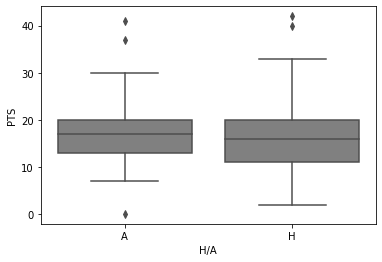

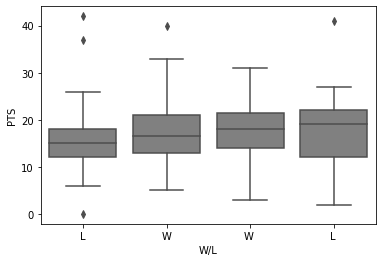

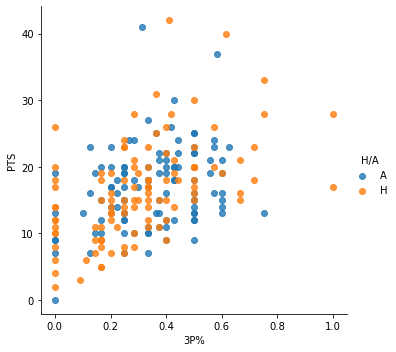

In [113]:
#### EDA 

sns.boxplot(x="H/A", y="PTS", data= JC_training, color = "gray");
plt.show()

sns.boxplot(x="W/L", y="PTS", data= JC_training, color = "gray");
plt.show()


sns.lmplot( x='3P%', y='PTS', data=JC_training, fit_reg=False, hue='H/A', legend=True)
plt.show()

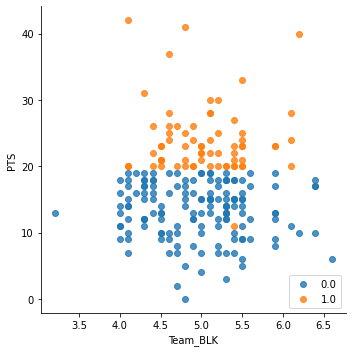

In [114]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Team_BLK", y="PTS", data=JC_training, fit_reg=False, hue='20+Points', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

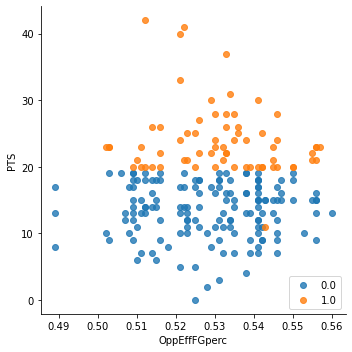

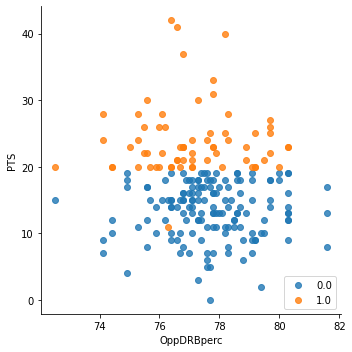

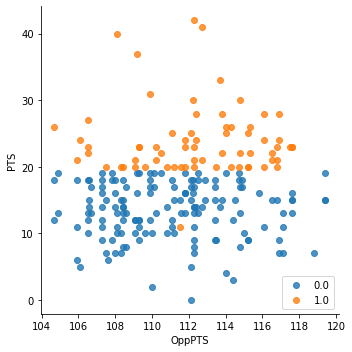

In [115]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="OppEffFGperc", y="PTS", data=JC_training, fit_reg=False, hue='20+Points', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()


# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="OppDRBperc", y="PTS", data=JC_training, fit_reg=False, hue='20+Points', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()


# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="OppPTS", y="PTS", data=JC_training, fit_reg=False, hue='20+Points', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [ ]:
# Convert predictor variable into factor
JC_training['20+Points'] = JC_training['20+Points'].astype(str)


In [ ]:
JC_testing['20+Points'] = JC_testing['20+Points'].astype(str)

In [ ]:
JC_testing.info()

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

In [141]:
### Get Final Training data 

frames = [JC_df2019, JC_df2020, JC_df]

data = pd.concat(frames)
data = data.dropna()

In [ ]:
data.to_csv(r'/Users/raytrey5/Desktop/IST_718_Project/JC_data.csv', index = False)

In [ ]:
######################################################addded cleaned data file in
data = pd.read_csv('/Users/caseymok/Desktop/JC_data.csv')

data

In [192]:
data

,MP,HomeAway,Opp,WinLoss,FG,FGA,FGperc,ThreePointMakes,ThreePointAttempts,ThreePointperc,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,29.0,A,ATL,L,6.0,14.0,0.429,1.0,4.0,0.250,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,27.0,H,ATL,W,7.0,15.0,0.467,1.0,5.0,0.200,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,23.0,H,ATL,L,7.0,12.0,0.583,3.0,5.0,0.600,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
3,30.0,H,BOS,L,7.0,11.0,0.636,0.0,1.0,0.000,...,15.1,108.0,34.7,26.3,8.6,5.3,0.514,13.4,77.0,0.198
4,27.0,H,BOS,L,2.0,13.0,0.154,1.0,7.0,0.143,...,15.1,108.0,34.7,26.3,8.6,5.3,0.514,13.4,77.0,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,34.0,H,SAS,W,7.0,20.0,0.350,2.0,10.0,0.200,...,13.4,112.2,34.6,24.4,7.0,5.1,0.541,11.8,77.3,0.174
61,23.0,A,SAS,W,8.0,13.0,0.615,2.0,6.0,0.333,...,13.4,112.2,34.6,24.4,7.0,5.1,0.541,11.8,77.3,0.174
62,33.0,H,TOR,W,6.0,18.0,0.333,1.0,6.0,0.167,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234
63,23.0,A,TOR,W,3.0,13.0,0.231,3.0,8.0,0.375,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 64
Data columns (total 48 columns):
MP              217 non-null float64
H/A             217 non-null object
Opp             217 non-null object
W/L             217 non-null object
FG              217 non-null float64
FGA             217 non-null float64
FG%             217 non-null float64
3P              217 non-null float64
3PA             217 non-null float64
3P%             217 non-null float64
FT              217 non-null float64
FTA             217 non-null float64
FT%             217 non-null float64
ORB             217 non-null float64
DRB             217 non-null float64
TRB             217 non-null float64
AST             217 non-null float64
STL             217 non-null float64
BLK             217 non-null float64
TOV             217 non-null float64
PF              217 non-null float64
PTS             217 non-null float64
20+Points       217 non-null float64
Team            217 non-null object
OppFG       

In [143]:
data.iloc[:, 24:] = data.iloc[:, 24:].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 64
Data columns (total 48 columns):
MP              217 non-null float64
H/A             217 non-null object
Opp             217 non-null object
W/L             217 non-null object
FG              217 non-null float64
FGA             217 non-null float64
FG%             217 non-null float64
3P              217 non-null float64
3PA             217 non-null float64
3P%             217 non-null float64
FT              217 non-null float64
FTA             217 non-null float64
FT%             217 non-null float64
ORB             217 non-null float64
DRB             217 non-null float64
TRB             217 non-null float64
AST             217 non-null float64
STL             217 non-null float64
BLK             217 non-null float64
TOV             217 non-null float64
PF              217 non-null float64
PTS             217 non-null float64
20+Points       217 non-null float64
Team            217 non-null object
OppFG       

In [144]:
# Rename a couple columns Column
data = data.rename(columns={'H/A': 'HomeAway'})
data = data.rename(columns={'FG%': 'FGperc'})
data = data.rename(columns={'3P%': 'ThreePointperc'})
data = data.rename(columns={'3P': 'ThreePointMakes'})
data = data.rename(columns={'3PA': 'ThreePointAttempts'})
data = data.rename(columns={'FT%': 'FTperc'})
data = data.rename(columns={'W/L': 'WinLoss'})
# Convert prediction variable into string
data['20+Points'] = data['20+Points'].astype(str)
# Check for corrections
data.info()
                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 64
Data columns (total 48 columns):
MP                    217 non-null float64
HomeAway              217 non-null object
Opp                   217 non-null object
WinLoss               217 non-null object
FG                    217 non-null float64
FGA                   217 non-null float64
FGperc                217 non-null float64
ThreePointMakes       217 non-null float64
ThreePointAttempts    217 non-null float64
ThreePointperc        217 non-null float64
FT                    217 non-null float64
FTA                   217 non-null float64
FTperc                217 non-null float64
ORB                   217 non-null float64
DRB                   217 non-null float64
TRB                   217 non-null float64
AST                   217 non-null float64
STL                   217 non-null float64
BLK                   217 non-null float64
TOV                   217 non-null float64
PF                    217 non-null floa

In [145]:
#### Decision Tree

#split dataset in features and target variable
feature_cols = ['OppPTS','Team_BLK','Team_STL','OppEffFGperc','ThreePointAttempts','FGA']
X = data[feature_cols] # Features
y = data['20+Points'] # Target variable

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [147]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [148]:
y_pred

array(['0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0',
       '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '1.0', '1.0', '1.0'], dtype=object)

In [126]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [127]:
X_test

,OppPTS,Team_BLK,Team_STL,OppEffFGperc,ThreePointAttempts,FGA
78,116.9,4.6,8.3,0.546,8.0,15.0
33,104.7,4.9,8.7,0.516,4.0,10.0
34,114.3,4.7,6.8,0.514,2.0,16.0
62,112.5,5.3,7.4,0.512,5.0,15.0
16,109.2,4.6,8.0,0.533,9.0,14.0
...,...,...,...,...,...,...
9,111.2,4.8,7.8,0.550,8.0,15.0
49,112.3,4.7,7.6,0.541,7.0,11.0
35,109.1,4.5,7.5,0.523,6.0,11.0
73,108.4,5.3,8.3,0.509,6.0,17.0


In [128]:
X_train

,OppPTS,Team_BLK,Team_STL,OppEffFGperc,ThreePointAttempts,FGA
57,108.4,5.3,8.0,0.523,8.0,14.0
41,117.6,5.5,8.8,0.556,5.0,10.0
56,111.1,5.2,9.3,0.523,7.0,17.0
34,112.4,5.1,9.1,0.535,15.0,22.0
55,111.1,5.2,9.3,0.523,8.0,22.0
...,...,...,...,...,...,...
51,112.9,4.4,6.9,0.547,9.0,16.0
56,108.4,5.3,8.0,0.523,4.0,13.0
72,108.4,5.3,8.3,0.509,9.0,14.0
59,116.1,6.1,6.3,0.530,6.0,9.0


In [129]:
y_test

78    1.0
33    0.0
34    1.0
62    0.0
16    0.0
     ... 
9     0.0
49    0.0
35    0.0
73    0.0
14    0.0
Name: 20+Points, Length: 66, dtype: object

In [130]:
y_train

57    0.0
41    0.0
56    0.0
34    1.0
55    1.0
     ... 
51    0.0
56    0.0
72    1.0
59    1.0
37    1.0
Name: 20+Points, Length: 151, dtype: object

In [131]:
from sklearn.metrics import accuracy_score


accuracy_score(y_pred, y_test)

0.6212121212121212

In [200]:
### increase random state
################output of 75%

feature_cols = ['OppPTS','Team_BLK','Team_STL','OppEffFGperc','ThreePointAttempts','FGA']

X2 = data[feature_cols] # Features
y = data['20+Points'] # Target variab

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=4) # 70% training and 30% test


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X2_train,y2_train)

#Predict the response for test dataset
y2_pred = clf.predict(X2_test)

clf.fit(X2_train,y2_train)


accuracy_score(y2_pred, y2_test)

0.696969696969697

In [201]:
### heatmap shows MP has high correlation 
###################################output of77%

feature_cols_2 = ['Team_BLK','Team_STL','OppEffFGperc','ThreePointAttempts','FGA', 'MP']

X2 = data[feature_cols_2] # Features
y = data['20+Points'] # Target variab

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=4) # 70% training and 30% test


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X2_train,y2_train)

#Predict the response for test dataset
y2_pred = clf.predict(X2_test)

clf.fit(X2_train,y2_train)


accuracy_score(y2_pred, y2_test)

0.6909090909090909

In [197]:
# taking out OppPts brings accuracy way up
###########################output of 86%

feature_cols_3 = ['Team_DRB','Team_BLK','Team_STL','OppEffFGperc','ThreePointAttempts','FGA', 'MP']

X2 = data[feature_cols_3] # Features
y = data['20+Points'] # Target variab

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=4) # 75% training and 25% test


clf = DecisionTreeClassifier()

clf = clf.fit(X2_train,y2_train)

y2_pred = clf.predict(X2_test)

clf.fit(X2_train,y2_train)


accuracy_score(y2_pred, y2_test)

0.6909090909090909

In [164]:
### Dataframe to predict against clippers

# Initialise data to lists.
data1 = [{'Team_DRB': 34.7, 'Team_BLK': 4.1, 'Team_STL': 7.1, 'OppEffFGperc': .531, 'ThreePointAttempts': 10,'FGA': 20, 'MP': 30}]
# Creates DataFrame.
clippers_df = pd.DataFrame(data1)
clippers_df

,Team_DRB,Team_BLK,Team_STL,OppEffFGperc,ThreePointAttempts,FGA,MP
0,34.7,4.1,7.1,0.531,10,20,30


In [165]:
## Will he score 20+ points vs the clippers?

clips_pred = clf.predict(clippers_df)
clips_pred



array(['0.0'], dtype=object)

In [198]:
##Bayes
feature_cols_4 = ['Team_DRB','Team_BLK','Team_STL','OppEffFGperc','ThreePointAttempts','FGA','FGperc','MP']

X2 = data[feature_cols_4] # Features
y = data['20+Points'] # Target variab

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=4) # 75% training and 25% test



#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb = gnb.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = gnb.predict(X2_test)

accuracy_score(y2_pred, y2_test)

0.8363636363636363

In [178]:
### Dataframe to predict against clippers

# Initialise data to lists.
data1 = [{'Team_DRB': 32.6, 'Team_BLK': 4.6, 'Team_STL': 6.3, 'OppEffFGperc': .531, 'ThreePointAttempts': 9,'FGA': 18, 'FGperc': .444, 'MP': 25}]
# Creates DataFrame.
clippers_df = pd.DataFrame(data1)
clippers_df

,Team_DRB,Team_BLK,Team_STL,OppEffFGperc,ThreePointAttempts,FGA,FGperc,MP
0,32.6,4.6,6.3,0.531,9,18,0.444,25


In [179]:
## Will he score 20+ points vs the clippers?

clips_pred = gnb.predict(clippers_df)
clips_pred

array(['1.0'], dtype='<U3')

In [193]:
data2 = [{"Team_DRB" : 35.3, "MP" : 21, "Team_STL" : 9.1,  "Team_BLK" : 5.1, "OppEffFGperc" : .535, "ThreePointAttempts" : 9, "FGperc" : .444, "FGA" : 18}]
memphis_df = pd.DataFrame(data2)
memphis_df


,Team_DRB,MP,Team_STL,Team_BLK,OppEffFGperc,ThreePointAttempts,FGperc,FGA
0,35.3,21,9.1,5.1,0.535,9,0.444,18


In [195]:
grizz_pred = gnb.predict(memphis_df)
grizz_pred

array(['0.0'], dtype='<U3')

In [213]:
Ingles = pd.read_csv('/Users/raytrey5/Desktop/IST_718_Project/JoeIngles_data.csv')

Ingles

,HomeAway,Opp,WinLoss,GS,MP,FG,FGA,FG%,3P,3PA,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
0,A,ATL,L,1.0,33.0,5.0,8.0,0.625,3.0,5.0,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
1,H,ATL,W,1.0,32.0,7.0,12.0,0.583,3.0,6.0,...,15.0,119.4,34.5,25.8,8.2,5.1,0.541,12.8,76.4,0.237
2,A,BOS,W,1.0,30.0,3.0,6.0,0.500,1.0,4.0,...,15.1,108.0,34.7,26.3,8.6,5.3,0.514,13.4,77.0,0.198
3,H,BOS,W,1.0,35.0,10.0,14.0,0.714,5.0,9.0,...,15.1,108.0,34.7,26.3,8.6,5.3,0.514,13.4,77.0,0.198
4,H,BRK,W,1.0,30.0,1.0,5.0,0.200,0.0,3.0,...,13.5,112.3,35.6,23.8,6.6,4.1,0.512,11.6,76.4,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,A,SAS,W,0.0,21.0,5.0,9.0,0.556,2.0,6.0,...,13.4,112.2,34.6,24.4,7.0,5.1,0.541,11.8,77.3,0.174
214,H,TOR,W,1.0,34.0,4.0,8.0,0.500,4.0,7.0,...,13.4,112.2,34.6,24.4,7.0,5.1,0.541,11.8,77.3,0.174
215,A,TOR,W,0.0,33.0,5.0,6.0,0.833,5.0,6.0,...,13.4,112.2,34.6,24.4,7.0,5.1,0.541,11.8,77.3,0.174
216,H,WAS,L,1.0,31.0,6.0,16.0,0.375,3.0,9.0,...,16.2,111.5,32.1,24.1,8.6,5.4,0.543,14.4,76.3,0.234


In [183]:
Ingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 49 columns):
HomeAway        218 non-null object
Opp             218 non-null object
WinLoss         218 non-null object
GS              218 non-null float64
MP              218 non-null float64
FG              218 non-null float64
FGA             218 non-null float64
FG%             218 non-null float64
3P              218 non-null float64
3PA             218 non-null float64
3P%             218 non-null float64
FT              218 non-null float64
FTA             218 non-null float64
FT%             218 non-null float64
ORB             218 non-null float64
DRB             218 non-null float64
TRB             218 non-null float64
AST             218 non-null float64
STL             218 non-null float64
BLK             218 non-null float64
TOV             218 non-null float64
PF              218 non-null float64
PTS             218 non-null float64
Three+3s        218 non-null float64
Team      

In [221]:
# Rename a couple columns Column
Ingles = Ingles.rename(columns={'H/A': 'HomeAway'})
Ingles = Ingles.rename(columns={'FG%': 'FGperc'})
Ingles = Ingles.rename(columns={'3P%': 'ThreePointperc'})
Ingles = Ingles.rename(columns={'3P': 'ThreePointMakes'})
Ingles = Ingles.rename(columns={'3PA': 'ThreePointAttempts'})
Ingles = Ingles.rename(columns={'FT%': 'FTperc'})
Ingles = Ingles.rename(columns={'W/L': 'WinLoss'})
# Convert prediction variable into string
Ingles['Three+3s'] = Ingles['Three+3s'].astype(str)
# Check for corrections
Ingles.info()
              

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 217
Data columns (total 49 columns):
HomeAway              217 non-null object
Opp                   217 non-null object
WinLoss               217 non-null object
GS                    217 non-null float64
MP                    217 non-null float64
FG                    217 non-null float64
FGA                   217 non-null float64
FGperc                217 non-null float64
ThreePointMakes       217 non-null float64
ThreePointAttempts    217 non-null float64
ThreePointperc        217 non-null float64
FT                    217 non-null float64
FTA                   217 non-null float64
FTperc                217 non-null float64
ORB                   217 non-null float64
DRB                   217 non-null float64
TRB                   217 non-null float64
AST                   217 non-null float64
STL                   217 non-null float64
BLK                   217 non-null float64
TOV                   217 non-null flo

In [214]:
Ingles = Ingles.drop(labels=[166], axis=0)

In [216]:
Ingles[160:]

,HomeAway,Opp,WinLoss,GS,MP,FG,FGA,FG%,3P,3PA,...,OppTOV,OppPTS,Team_DRB,Team_AST,Team_STL,Team_BLK,OppEffFGperc,OppTOVperc,OppDRBperc,FT/FGA
160,A,CHI,W,0.0,26.0,6.0,8.0,0.750,5.0,6.0,...,12.8,111.8,35.3,26.8,6.7,4.2,0.538,11.6,80.3,0.196
161,H,CHO,W,0.0,30.0,7.0,11.0,0.636,7.0,10.0,...,14.8,111.2,33.2,26.8,7.8,4.8,0.550,13.2,75.7,0.163
162,A,CHO,W,0.0,28.0,3.0,5.0,0.600,2.0,4.0,...,14.8,111.2,33.2,26.8,7.8,4.8,0.550,13.2,75.7,0.163
163,H,CLE,W,0.0,18.0,2.0,3.0,0.667,2.0,3.0,...,14.5,112.3,32.3,23.8,7.8,4.5,0.556,13.0,76.6,0.183
164,A,DAL,L,0.0,25.0,1.0,4.0,0.250,1.0,2.0,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197
165,H,DAL,W,1.0,28.0,4.0,7.0,0.571,2.0,4.0,...,12.7,109.9,34.2,22.9,6.3,4.3,0.534,11.5,77.8,0.197
167,H,DEN,W,1.0,35.0,3.0,9.0,0.333,2.0,6.0,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.200
168,A,DEN,L,0.0,25.0,3.0,7.0,0.429,2.0,4.0,...,14.1,110.2,33.9,26.8,8.1,4.5,0.545,12.9,78.9,0.200
169,H,DET,W,0.0,24.0,1.0,5.0,0.200,1.0,4.0,...,14.0,111.1,33.1,24.2,7.4,5.2,0.541,12.6,76.9,0.195
170,A,DET,W,0.0,24.0,3.0,6.0,0.500,2.0,5.0,...,14.0,111.1,33.1,24.2,7.4,5.2,0.541,12.6,76.9,0.195


In [218]:
##Bayes
feature_cols_5 = ['Team_DRB','Team_BLK','Team_STL','Opp3PPerc','OppEffFGperc','ThreePointAttempts','FGA','FGperc','MP']

X3 = Ingles[feature_cols_5] # Features
y3 = Ingles['Three+3s'] # Target variab

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=4) # 75% training and 25% test



#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb = gnb.fit(X3_train, y3_train)

#Predict the response for test dataset
y3_pred = gnb.predict(X3_test)

accuracy_score(y3_pred, y3_test)

0.7818181818181819

In [219]:
### Dataframe to predict against clippers

# Initialise data to lists.
data2 = [{'Team_DRB': 32.6, 'Team_BLK': 4.6, 'Team_STL': 6.3,'Opp3PPerc': .399, 'OppEffFGperc': .531, 'ThreePointAttempts': 8,'FGA': 11, 'FGperc': .50, 'MP': 30}]
# Creates DataFrame.
clippers_df2 = pd.DataFrame(data2)
clippers_df2

,Team_DRB,Team_BLK,Team_STL,Opp3PPerc,OppEffFGperc,3PA,FGA,FG%,MP
0,32.6,4.6,6.3,0.399,0.531,8,11,0.5,30


In [220]:
## Will he score 3+ points vs the clippers?

clips_pred1 = gnb.predict(clippers_df2)
clips_pred1

array([1.])

In [222]:
##Bayes
feature_cols_5 = ['Team_DRB','Team_BLK','Team_STL','Opp3PPerc','OppEffFGperc'
                  ,'ThreePointAttempts','FGA','FGperc','MP','ThreePointperc']

X3 = Ingles[feature_cols_5] # Features
y3 = Ingles['Three+3s'] # Target variab

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=4) # 75% training and 25% test



#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb = gnb.fit(X3_train, y3_train)

#Predict the response for test dataset
y3_pred = gnb.predict(X3_test)

accuracy_score(y3_pred, y3_test)

0.8727272727272727

In [223]:
### Dataframe to predict against clippers

# Initialise data to lists.
data2 = [{'Team_DRB': 32.6, 'Team_BLK': 4.6, 'Team_STL': 6.3,'Opp3PPerc': .399, 'OppEffFGperc': .531, 'ThreePointAttempts': 8,'FGA': 11, 'FGperc': .50, 'MP': 30, 'ThreePointperc': .41}]
# Creates DataFrame.
clippers_df2 = pd.DataFrame(data2)
clippers_df2

,Team_DRB,Team_BLK,Team_STL,Opp3PPerc,OppEffFGperc,ThreePointAttempts,FGA,FGperc,MP,ThreePointperc
0,32.6,4.6,6.3,0.399,0.531,8,11,0.5,30,0.41


In [224]:
## Will he score 3+ points vs the clippers?

clips_pred1 = gnb.predict(clippers_df2)
clips_pred1

array(['1.0'], dtype='<U3')